In [98]:
# Kết nối Google Drive (nếu chạy trong Colab)
try:
    from google.colab import drive
    print("Kết nối Google Drive...")
    drive.mount('/content/drive')
except:
    print("Không thể kết nối Google Drive hoặc không chạy trong môi trường Colab.")

Kết nối Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **explore_data_detailed**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from scipy.fft import fft, fftfreq
import pandas as pd

# Đường dẫn đến file dữ liệu
data_path = '/content/drive/MyDrive/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_data.mat'
figures_path = '/content/drive/MyDrive/bidmc/figures'
os.makedirs(figures_path, exist_ok=True)

# Tải dữ liệu
print("Đang tải dữ liệu từ file .mat...")
mat_data = sio.loadmat(data_path)
data = mat_data['data'][0]  # Lấy mảng chính chứa 53 bản ghi



Đang tải dữ liệu từ file .mat...


In [100]:
# Khám phá cấu trúc dữ liệu
print(f"Số lượng bản ghi: {len(data)}")

# Khám phá cấu trúc chi tiết của bản ghi đầu tiên
first_record = data[0]
print("\nKhám phá cấu trúc chi tiết của bản ghi đầu tiên:")

# Kiểm tra cấu trúc của trường ppg
ppg_field = first_record['ppg'][0, 0]
print(f"Cấu trúc của trường ppg: {type(ppg_field)}")
if hasattr(ppg_field, 'dtype') and hasattr(ppg_field.dtype, 'names'):
    print(f"Các trường con của ppg: {ppg_field.dtype.names}")

# Kiểm tra cấu trúc của trường ref
ref_field = first_record['ref'][0, 0]
print(f"Cấu trúc của trường ref: {type(ref_field)}")
if hasattr(ref_field, 'dtype') and hasattr(ref_field.dtype, 'names'):
    print(f"Các trường con của ref: {ref_field.dtype.names}")


# Kiểm tra chi tiết hơn về cấu trúc dữ liệu
print("\nKiểm tra chi tiết hơn về cấu trúc dữ liệu:")
print(f"Kiểu dữ liệu của ppg.v: {type(first_record['ppg'][0, 0]['v'])}")
print(f"Kích thước của ppg.v: {first_record['ppg'][0, 0]['v'].shape}")



Số lượng bản ghi: 53

Khám phá cấu trúc chi tiết của bản ghi đầu tiên:
Cấu trúc của trường ppg: <class 'numpy.void'>
Các trường con của ppg: ('v', 'fs', 'method')
Cấu trúc của trường ref: <class 'numpy.void'>
Các trường con của ref: ('resp_sig', 'breaths', 'params')

Kiểm tra chi tiết hơn về cấu trúc dữ liệu:
Kiểu dữ liệu của ppg.v: <class 'numpy.ndarray'>
Kích thước của ppg.v: (60001, 1)



Tần số lấy mẫu PPG: 125.0 Hz
Tần số lấy mẫu ECG: 125.0 Hz
Tần số lấy mẫu Resp: 125.0 Hz
Độ dài tín hiệu PPG: 60001 mẫu
Độ dài tín hiệu ECG: 60001 mẫu
Độ dài tín hiệu Resp: 60001 mẫu


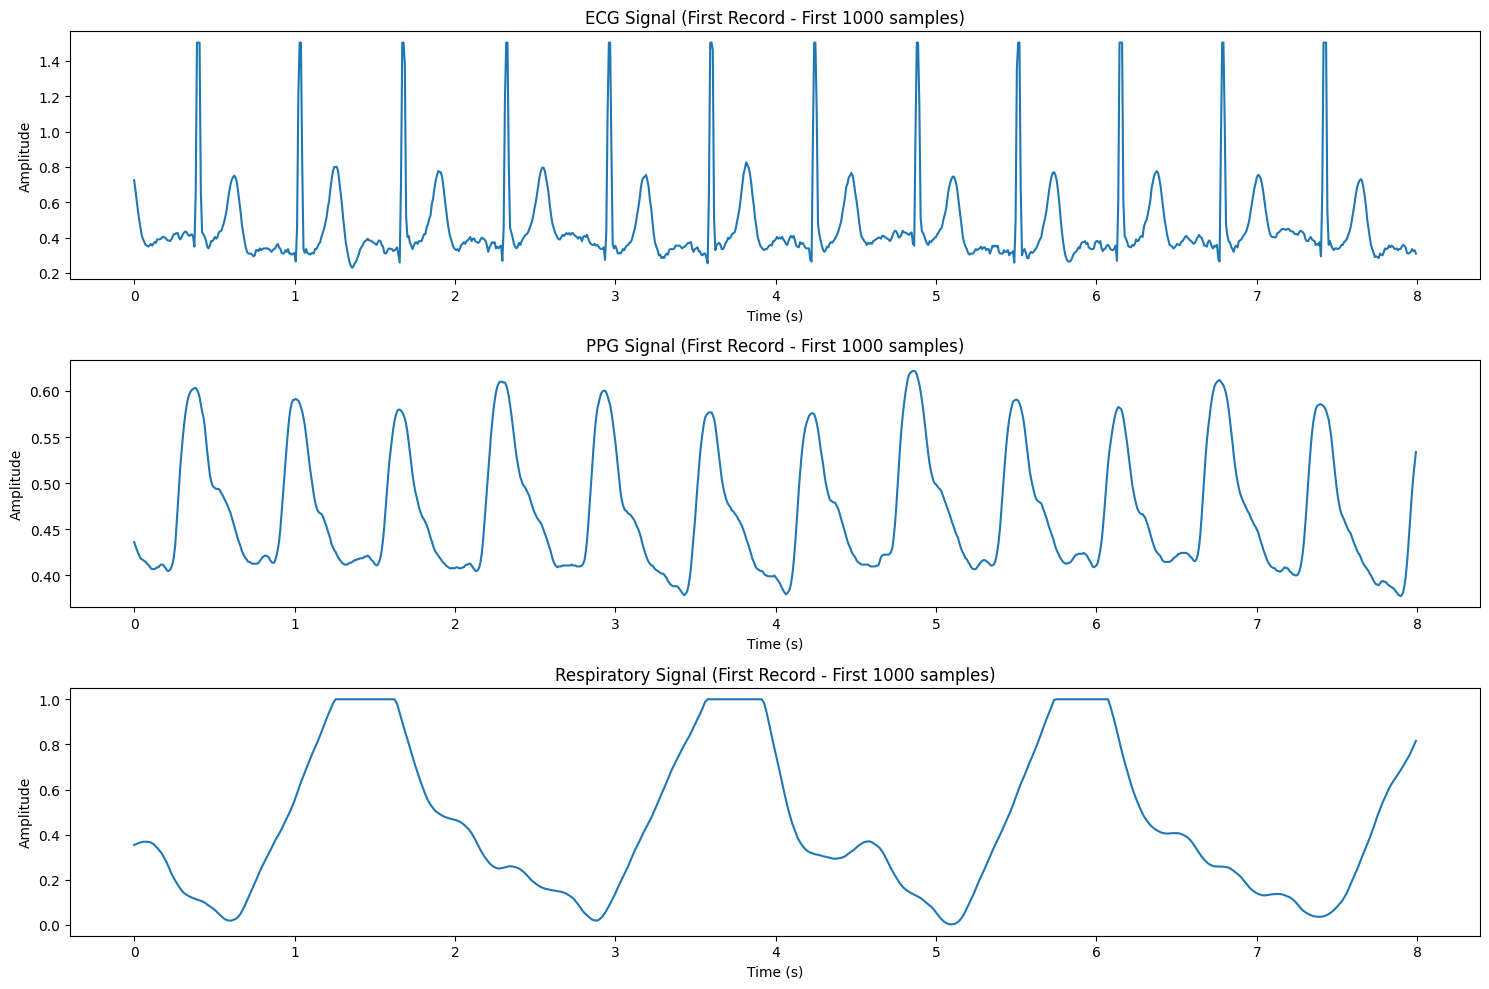

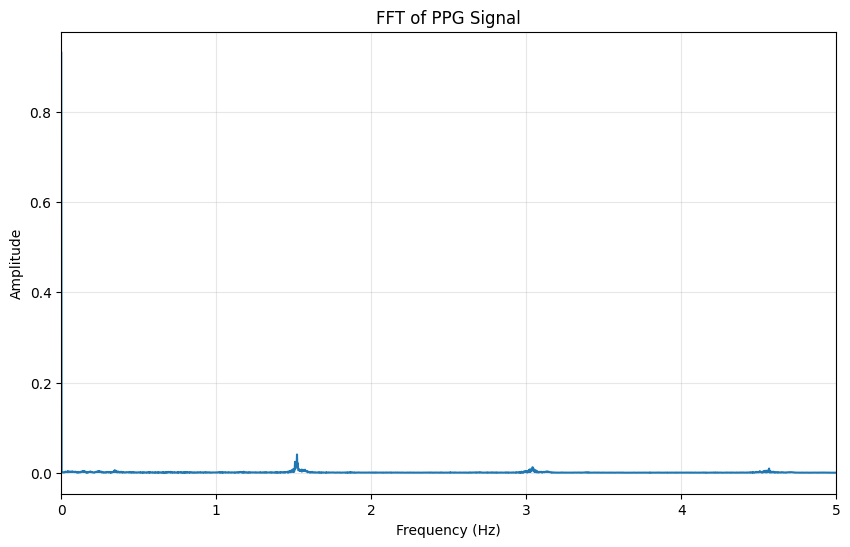

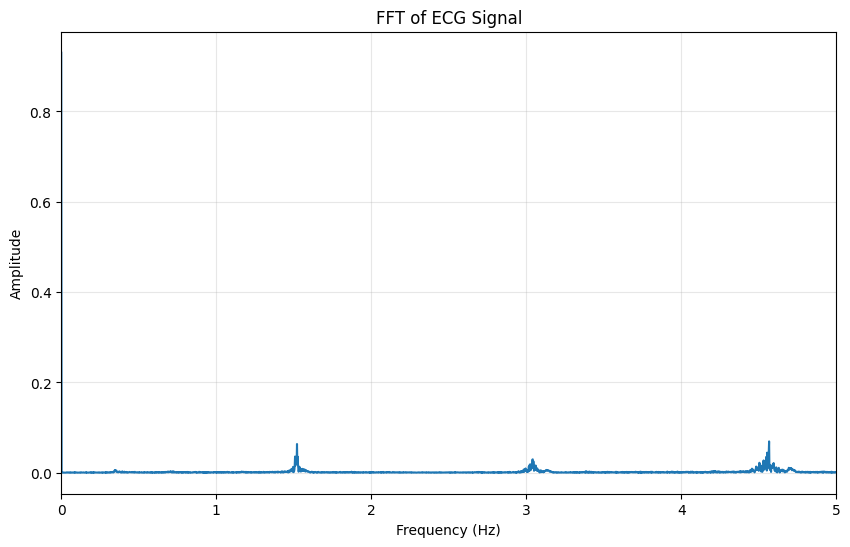

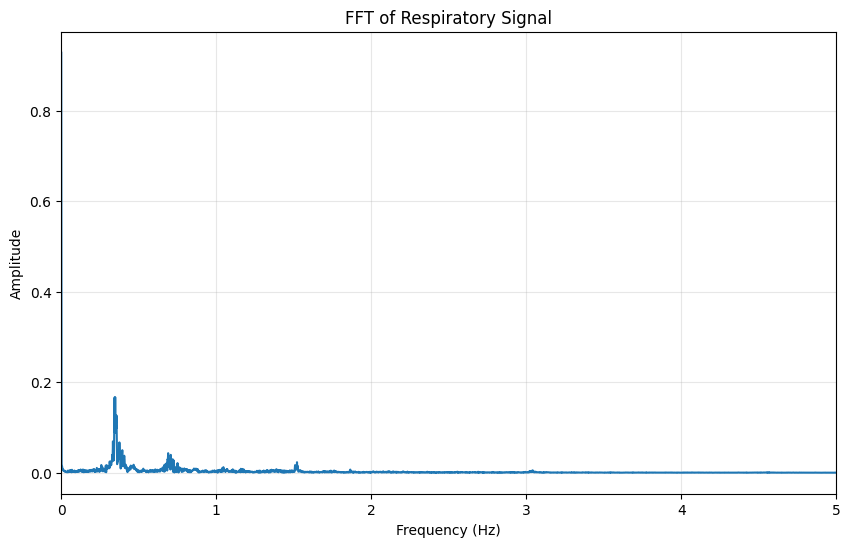


Phân tích dữ liệu hoàn tất. Các biểu đồ và báo cáo đã được lưu vào thư mục figures.


In [101]:
# Trích xuất và vẽ tín hiệu PPG từ bản ghi đầu tiên
try:
    # Truy cập trực tiếp vào dữ liệu PPG
    ppg_data = first_record['ppg'][0, 0]['v']
    if isinstance(ppg_data, np.ndarray):
        # Nếu là mảng numpy, lấy dữ liệu trực tiếp
        sample_ppg = ppg_data.flatten()
    else:
        # Nếu không phải mảng numpy, chuyển đổi thành mảng
        sample_ppg = np.array(ppg_data, dtype=float).flatten()

    # Lấy tần số lấy mẫu
    sample_fs_ppg = float(first_record['ppg'][0, 0]['fs'][0, 0])

    # Tương tự cho ECG và Resp
    ecg_data = first_record['ekg'][0, 0]['v']
    if isinstance(ecg_data, np.ndarray):
        sample_ecg = ecg_data.flatten()
    else:
        sample_ecg = np.array(ecg_data, dtype=float).flatten()

    sample_fs_ecg = float(first_record['ekg'][0, 0]['fs'][0, 0])

    resp_data = first_record['ref'][0, 0]['resp_sig'][0, 0]['imp'][0, 0]['v']
    if isinstance(resp_data, np.ndarray):
        sample_resp = resp_data.flatten()
    else:
        sample_resp = np.array(resp_data, dtype=float).flatten()

    sample_fs_resp = float(first_record['ref'][0, 0]['resp_sig'][0, 0]['imp'][0, 0]['fs'][0, 0])

    print(f"\nTần số lấy mẫu PPG: {sample_fs_ppg} Hz")
    print(f"Tần số lấy mẫu ECG: {sample_fs_ecg} Hz")
    print(f"Tần số lấy mẫu Resp: {sample_fs_resp} Hz")

    print(f"Độ dài tín hiệu PPG: {len(sample_ppg)} mẫu")
    print(f"Độ dài tín hiệu ECG: {len(sample_ecg)} mẫu")
    print(f"Độ dài tín hiệu Resp: {len(sample_resp)} mẫu")

    # Tính thời gian cho trục x
    time_ppg = np.arange(len(sample_ppg)) / sample_fs_ppg
    time_ecg = np.arange(len(sample_ecg)) / sample_fs_ecg
    time_resp = np.arange(len(sample_resp)) / sample_fs_resp

    # Vẽ tín hiệu mẫu
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(time_ecg[:1000], sample_ecg[:1000])
    plt.title('ECG Signal (First Record - First 1000 samples)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(time_ppg[:1000], sample_ppg[:1000])
    plt.title('PPG Signal (First Record - First 1000 samples)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(time_resp[:1000], sample_resp[:1000])
    plt.title('Respiratory Signal (First Record - First 1000 samples)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, 'sample_signals.png'))
    plt.show()  # Hiển thị biểu đồ trên output

    # Phân tích phổ tần số của tín hiệu PPG
    def plot_fft(signal, fs, title, filename):
        N = len(signal)
        T = 1.0 / fs
        yf = fft(signal)
        xf = fftfreq(N, T)[:N//2]

        plt.figure(figsize=(10, 6))
        plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
        plt.grid(True, alpha=0.3)
        plt.title(f'FFT of {title}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.xlim(0, 5)  # Giới hạn tần số hiển thị đến 5Hz
        plt.savefig(os.path.join(figures_path, filename))
        plt.show()  # Hiển thị biểu đồ trên output

    # Phân tích phổ tần số của tín hiệu PPG, ECG và Resp
    plot_fft(sample_ppg, sample_fs_ppg, 'PPG Signal', 'ppg_fft.png')
    plot_fft(sample_ecg, sample_fs_ecg, 'ECG Signal', 'ecg_fft.png')
    plot_fft(sample_resp, sample_fs_resp, 'Respiratory Signal', 'resp_fft.png')

    # Tạo báo cáo tóm tắt
    with open(os.path.join(figures_path, 'data_exploration_summary.txt'), 'w') as f:
        f.write("BÁO CÁO KHÁM PHÁ DỮ LIỆU BIDMC PPG AND RESPIRATION DATASET\n")
        f.write("==========================================================\n\n")

        f.write(f"Số lượng bản ghi: {len(data)}\n\n")

        f.write("Cấu trúc dữ liệu:\n")
        f.write("- Mỗi bản ghi chứa các trường: ppg, ekg, ref, fix\n")
        f.write("- Tín hiệu PPG và ECG được lưu trữ với giá trị (v) và tần số lấy mẫu (fs)\n")
        f.write("- Tín hiệu hô hấp được lưu trữ trong trường ref.resp_sig.imp\n")
        f.write("- Các thông số sinh lý (HR, RR, PR, SpO2) được lưu trữ trong trường ref.params\n\n")

        f.write(f"Tần số lấy mẫu PPG: {sample_fs_ppg} Hz\n")
        f.write(f"Tần số lấy mẫu ECG: {sample_fs_ecg} Hz\n")
        f.write(f"Tần số lấy mẫu Resp: {sample_fs_resp} Hz\n\n")

        f.write("Thách thức trong việc truy cập dữ liệu:\n")
        f.write("- Cấu trúc dữ liệu phức tạp với nhiều lớp lồng nhau\n")
        f.write("- Khó khăn trong việc chuyển đổi dữ liệu HR và RR sang định dạng float\n")
        f.write("- Cần phương pháp tiếp cận cẩn thận để trích xuất và xử lý dữ liệu\n\n")

        f.write("Các file đã tạo:\n")
        f.write("1. sample_signals.png - Biểu đồ mẫu của tín hiệu ECG, PPG và Respiratory\n")
        f.write("2. ppg_fft.png, ecg_fft.png, resp_fft.png - Phân tích phổ tần số của các tín hiệu\n")

    print("\nPhân tích dữ liệu hoàn tất. Các biểu đồ và báo cáo đã được lưu vào thư mục figures.")

except Exception as e:
    print(f"Lỗi khi vẽ tín hiệu mẫu: {e}")

# **check_data_structure**

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from scipy.fft import fft, fftfreq
import pandas as pd

# Đường dẫn đến file dữ liệu
data_path = '/content/drive/MyDrive/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_data.mat'
figures_path = '/content/drive/MyDrive/bidmc/figures'

# Tải dữ liệu
print("Đang tải dữ liệu từ file .mat...")
mat_data = sio.loadmat(data_path)

# Kiểm tra cấu trúc dữ liệu
print("Các khóa trong file .mat:")
for key in mat_data.keys():
    print(f"- {key}")

# Kiểm tra cấu trúc chi tiết
if 'data' in mat_data:
    data = mat_data['data']
    print(f"\nKiểu dữ liệu của 'data': {type(data)}")
    print(f"Kích thước của 'data': {data.shape}")

    # Kiểm tra cấu trúc của phần tử đầu tiên nếu data là mảng
    if isinstance(data, np.ndarray) and data.size > 0:
        first_record = data[0]
        if hasattr(first_record, 'dtype') and hasattr(first_record.dtype, 'names'):
            print("\nCác trường trong bản ghi đầu tiên:")
            for field in first_record.dtype.names:
                print(f"- {field}")

                # Kiểm tra cấu trúc chi tiết của từng trường
                field_data = first_record[field]
                print(f"  Kiểu: {type(field_data)}, Kích thước: {field_data.shape}")

                # Nếu là mảng có cấu trúc, hiển thị thêm thông tin
                if hasattr(field_data, 'dtype') and hasattr(field_data.dtype, 'names'):
                    print(f"  Các trường con: {field_data.dtype.names}")
        else:
            print(f"\nPhần tử đầu tiên không có cấu trúc trường, kiểu: {type(first_record)}")
    else:
        print("\nKhông thể truy cập phần tử đầu tiên của 'data'")
else:
    print("\nKhông tìm thấy khóa 'data' trong file .mat")
    print("Đang kiểm tra cấu trúc dữ liệu thay thế...")

    # Tìm khóa có thể chứa dữ liệu chính
    potential_data_keys = [k for k in mat_data.keys() if not k.startswith('__')]
    for key in potential_data_keys:
        print(f"\nKiểm tra khóa: {key}")
        data_item = mat_data[key]
        print(f"Kiểu: {type(data_item)}, ", end="")

        if isinstance(data_item, np.ndarray):
            print(f"Kích thước: {data_item.shape}")

            # Kiểm tra nếu là mảng có cấu trúc
            if data_item.dtype.names is not None:
                print(f"Các trường: {data_item.dtype.names}")

            # Kiểm tra phần tử đầu tiên nếu là mảng nhiều chiều
            if data_item.size > 0:
                first_item = data_item[0]
                print(f"Kiểu phần tử đầu tiên: {type(first_item)}")

                # Nếu phần tử đầu tiên là mảng có cấu trúc
                if hasattr(first_item, 'dtype') and hasattr(first_item.dtype, 'names'):
                    print(f"Các trường trong phần tử đầu tiên: {first_item.dtype.names}")
        else:
            print(f"Không phải mảng numpy")

print("\nĐang lưu thông tin cấu trúc dữ liệu vào file...")
with open(os.path.join(figures_path, 'data_structure.txt'), 'w') as f:
    f.write("CẤU TRÚC DỮ LIỆU BIDMC PPG AND RESPIRATION DATASET\n")
    f.write("=================================================\n\n")

    f.write("Các khóa trong file .mat:\n")
    for key in mat_data.keys():
        f.write(f"- {key}\n")

    f.write("\nThông tin chi tiết về cấu trúc dữ liệu được lưu trong file này.")

print("\nĐã lưu thông tin cấu trúc dữ liệu. Vui lòng kiểm tra file data_structure.txt")


Đang tải dữ liệu từ file .mat...
Các khóa trong file .mat:
- __header__
- __version__
- __globals__
- data

Kiểu dữ liệu của 'data': <class 'numpy.ndarray'>
Kích thước của 'data': (1, 53)

Các trường trong bản ghi đầu tiên:
- fix
  Kiểu: <class 'numpy.ndarray'>, Kích thước: (53,)
  Các trường con: None
- ppg
  Kiểu: <class 'numpy.ndarray'>, Kích thước: (53,)
  Các trường con: None
- ekg
  Kiểu: <class 'numpy.ndarray'>, Kích thước: (53,)
  Các trường con: None
- ref
  Kiểu: <class 'numpy.ndarray'>, Kích thước: (53,)
  Các trường con: None

Đang lưu thông tin cấu trúc dữ liệu vào file...

Đã lưu thông tin cấu trúc dữ liệu. Vui lòng kiểm tra file data_structure.txt


# **preprocess_data**

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split

# Đường dẫn đến file dữ liệu và các thư mục lưu kết quả
data_path = '/content/drive/MyDrive/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_data.mat'
processed_data_path = '/content/drive/MyDrive/bidmc/processed'
figures_path = '/content/drive/MyDrive/bidmc/figures'
os.makedirs(processed_data_path, exist_ok=True)
os.makedirs(figures_path, exist_ok=True)

# Tải dữ liệu từ file .mat
print("Đang tải dữ liệu từ file .mat...")
mat_data = sio.loadmat(data_path)

# Kiểm tra cấu trúc dữ liệu
print("Các khóa trong mat_data:", mat_data.keys())



Đang tải dữ liệu từ file .mat...
Các khóa trong mat_data: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [104]:
# Trích xuất dữ liệu từ khóa 'data'
data_key = 'data'
if data_key not in mat_data:
    raise KeyError(f"Không tìm thấy khóa '{data_key}' trong mat_data. Các khóa có sẵn: {mat_data.keys()}")

# Trích xuất danh sách các bản ghi
raw_records = mat_data[data_key][0]  # Lấy mảng chính chứa 53 bản ghi
print(f"Số bản ghi: {len(raw_records)}")

# Tạo danh sách các bản ghi hợp lệ
valid_records = []
for i in range(len(raw_records)):
    try:
        record = raw_records[i]

        # Trích xuất tín hiệu PPG
        ppg_data = record['ppg'][0, 0]['v']
        if isinstance(ppg_data, np.ndarray):
            ppg_signal = ppg_data.flatten()
        else:
            ppg_signal = np.array(ppg_data, dtype=float).flatten()

        # Trích xuất HR và RR
        try:
            # Trích xuất HR từ mảng lồng nhau
            hr_data = record['ref'][0, 0]['params'][0, 0]['hr'][0]
            if hasattr(hr_data, 'dtype') and hr_data.dtype.names is not None and 'v' in hr_data.dtype.names:
                hr_values_raw = hr_data['v']
            else:
                hr_values_raw = hr_data

            # Trích xuất RR từ mảng lồng nhau
            rr_data = record['ref'][0, 0]['params'][0, 0]['rr'][0]
            if hasattr(rr_data, 'dtype') and rr_data.dtype.names is not None and 'v' in rr_data.dtype.names:
                rr_values_raw = rr_data['v']
            else:
                rr_values_raw = rr_data

            # Trích xuất giá trị số từ mảng lồng nhau
            hr_values = []
            for item in hr_values_raw:
                if isinstance(item, np.ndarray) and item.size > 0:
                    hr_values.append(float(item[0]))
                elif np.isscalar(item):
                    hr_values.append(float(item))

            rr_values = []
            for item in rr_values_raw:
                if isinstance(item, np.ndarray) and item.size > 0:
                    rr_values.append(float(item[0]))
                elif np.isscalar(item):
                    rr_values.append(float(item))

            # Chuyển đổi sang mảng numpy
            hr_values = np.array(hr_values)
            rr_values = np.array(rr_values)

            # Kiểm tra xem có đủ dữ liệu không
            if len(ppg_signal) == 0 or len(hr_values) == 0 or len(rr_values) == 0:
                print(f"Bản ghi {i} thiếu dữ liệu (PPG: {len(ppg_signal)}, HR: {len(hr_values)}, RR: {len(rr_values)}), bỏ qua")
                continue

        except Exception as e:
            print(f"Lỗi khi trích xuất HR/RR của bản ghi {i}: {e}, bỏ qua bản ghi này")
            continue

        valid_records.append({
            'ppg': ppg_signal,
            'hr': hr_values,
            'rr': rr_values,
            'ppg_fs': 125  # Tần số lấy mẫu của PPG (theo tài liệu BIDMC)
        })

    except Exception as e:
        print(f"Lỗi khi xử lý bản ghi {i}: {e}")

print(f"Số bản ghi hợp lệ: {len(valid_records)}")
if not valid_records:
    raise ValueError("Không tìm thấy bản ghi hợp lệ nào")



Số bản ghi: 53
Số bản ghi hợp lệ: 53


<ipython-input-104-de518bddb6bc>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hr_values.append(float(item[0]))
<ipython-input-104-de518bddb6bc>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rr_values.append(float(item[0]))


Đang thu thập dữ liệu từ các bản ghi...

Thống kê trước xử lý:
PPG: mean = 0.6963, std = 0.5805, min = 0.0000, max = 4.0020
HR: mean = 89.15, std = 12.76, min = 63.00, max = 126.00
RR: mean = 17.57, std = 3.65, min = 4.00, max = 25.00


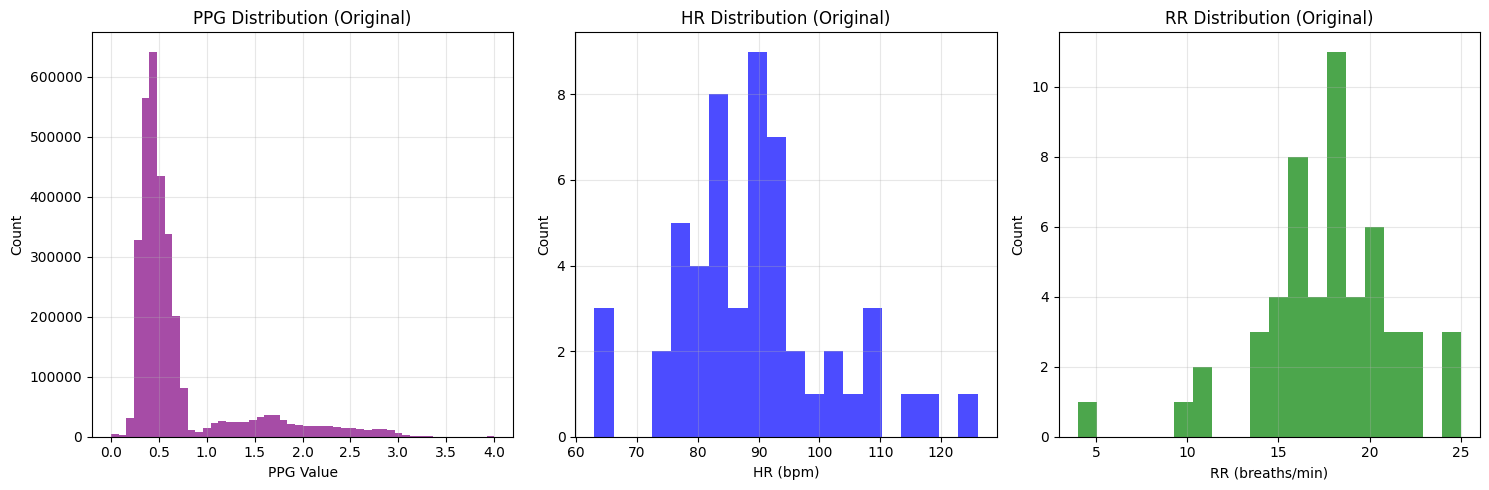

In [105]:
# Khởi tạo các mảng để lưu dữ liệu
ppg_segments = []
hr_segments = []
rr_segments = []
all_hr_values = []
all_rr_values = []
all_ppg_values = []  # Để lưu tất cả giá trị PPG gốc

# Bước 1: Thu thập tất cả giá trị PPG, HR và RR từ các bản ghi
print("Đang thu thập dữ liệu từ các bản ghi...")
for i, record in enumerate(valid_records):
    try:
        ppg = record['ppg']
        hr_values = record['hr']
        rr_values = record['rr']

        # Lưu các giá trị PPG, HR và RR
        all_ppg_values.extend(ppg)
        all_hr_values.extend(hr_values)
        all_rr_values.extend(rr_values)

    except Exception as e:
        print(f"Lỗi khi thu thập PPG/HR/RR từ bản ghi {i}: {e}")

# Kiểm tra nếu không thu thập được dữ liệu
if not all_ppg_values or not all_hr_values or not all_rr_values:
    raise ValueError("Không thu thập được dữ liệu PPG, HR hoặc RR từ các bản ghi")

# Chuyển đổi thành mảng numpy
all_ppg_values = np.array(all_ppg_values)
all_hr_values = np.array(all_hr_values)
all_rr_values = np.array(all_rr_values)

# Thống kê trước xử lý
print("\nThống kê trước xử lý:")
print(f"PPG: mean = {np.mean(all_ppg_values):.4f}, std = {np.std(all_ppg_values):.4f}, min = {np.min(all_ppg_values):.4f}, max = {np.max(all_ppg_values):.4f}")
print(f"HR: mean = {np.mean(all_hr_values):.2f}, std = {np.std(all_hr_values):.2f}, min = {np.min(all_hr_values):.2f}, max = {np.max(all_hr_values):.2f}")
print(f"RR: mean = {np.mean(all_rr_values):.2f}, std = {np.std(all_rr_values):.2f}, min = {np.min(all_rr_values):.2f}, max = {np.max(all_rr_values):.2f}")

# Vẽ biểu đồ phân bố của PPG, HR và RR trước xử lý
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(all_ppg_values, bins=50, alpha=0.7, color='purple')
plt.title('PPG Distribution (Original)')
plt.xlabel('PPG Value')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(all_hr_values, bins=20, alpha=0.7, color='blue')
plt.title('HR Distribution (Original)')
plt.xlabel('HR (bpm)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(all_rr_values, bins=20, alpha=0.7, color='green')
plt.title('RR Distribution (Original)')
plt.xlabel('RR (breaths/min)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Thống kê sau khi chuẩn hóa HR và RR:
HR (normalized): mean = 0.4151, std = 0.2025, min = 0.0000, max = 1.0000
RR (normalized): mean = 0.6460, std = 0.1737, min = 0.0000, max = 1.0000


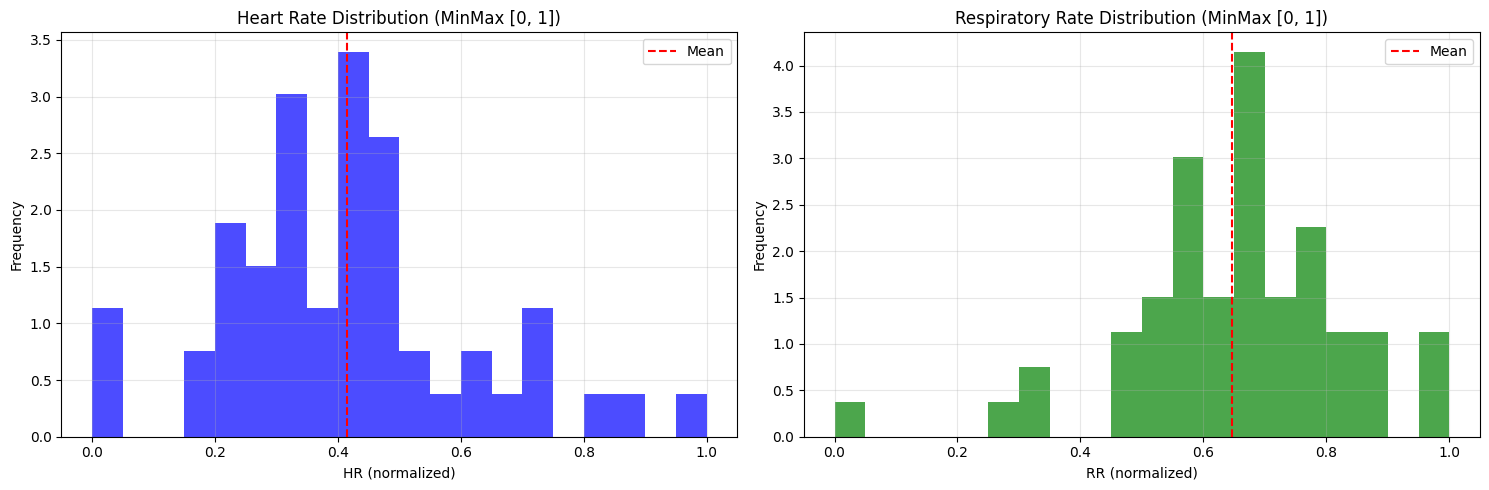

In [106]:
# Bước 2: Chuẩn hóa HR và RR về [0, 1] bằng MinMaxScaler
hr_scaler = MinMaxScaler(feature_range=(0, 1))
rr_scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape dữ liệu để phù hợp với MinMaxScaler
all_hr_values = all_hr_values.reshape(-1, 1)
all_rr_values = all_rr_values.reshape(-1, 1)

# Chuẩn hóa
hr_normalized = hr_scaler.fit_transform(all_hr_values).flatten()
rr_normalized = rr_scaler.fit_transform(all_rr_values).flatten()

# Xử lý giá trị NaN (nếu có)
hr_normalized = np.nan_to_num(hr_normalized, nan=0.0)
rr_normalized = np.nan_to_num(rr_normalized, nan=0.0)

# Thống kê sau khi chuẩn hóa HR và RR
print("\nThống kê sau khi chuẩn hóa HR và RR:")
print(f"HR (normalized): mean = {np.mean(hr_normalized):.4f}, std = {np.std(hr_normalized):.4f}, min = {np.min(hr_normalized):.4f}, max = {np.max(hr_normalized):.4f}")
print(f"RR (normalized): mean = {np.mean(rr_normalized):.4f}, std = {np.std(rr_normalized):.4f}, min = {np.min(rr_normalized):.4f}, max = {np.max(rr_normalized):.4f}")

# Vẽ biểu đồ phân bố của HR và RR (sau khi chuẩn hóa) - giống với biểu đồ của thầy bạn
plt.figure(figsize=(15, 5))

# Biểu đồ phân bố của HR (chuẩn hóa)
plt.subplot(1, 2, 1)
counts, bins, _ = plt.hist(hr_normalized, bins=20, alpha=0.7, density=True, color='blue')
plt.axvline(x=np.mean(hr_normalized), color='red', linestyle='--', label='Mean')
plt.title('Heart Rate Distribution (MinMax [0, 1])')
plt.xlabel('HR (normalized)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()

# Biểu đồ phân bố của RR (chuẩn hóa)
plt.subplot(1, 2, 2)
counts, bins, _ = plt.hist(rr_normalized, bins=20, alpha=0.7, density=True, color='green')
plt.axvline(x=np.mean(rr_normalized), color='red', linestyle='--', label='Mean')
plt.title('Respiratory Rate Distribution (MinMax [0, 1])')
plt.xlabel('RR (normalized)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()



In [107]:
# Bước 3: Tiền xử lý tín hiệu PPG
fs = 125  # Tần số lấy mẫu (Hz)
segment_length = int(fs * 10)  # Độ dài đoạn tín hiệu: 10 giây (1250 mẫu)

# Thiết kế bộ lọc Butterworth bandpass (0.1-8 Hz)
nyquist = fs / 2
lowcut = 0.1
highcut = 8.0
low_cutoff = lowcut / nyquist
high_cutoff = highcut / nyquist
b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')  # order=2

# Bộ chuẩn hóa tín hiệu PPG về [0, 1]
ppg_scaler = MinMaxScaler(feature_range=(0, 1))




Thống kê tín hiệu PPG của bản ghi 0:
PPG gốc: mean = 0.4658, std = 0.0655, min = 0.2239, max = 0.6979
PPG sau khi lọc: mean = 0.0000, std = 0.0641, min = -0.2087, max = 0.2446
PPG sau khi chuẩn hóa: mean = 0.4605, std = 0.1413, min = 0.0000, max = 1.0000


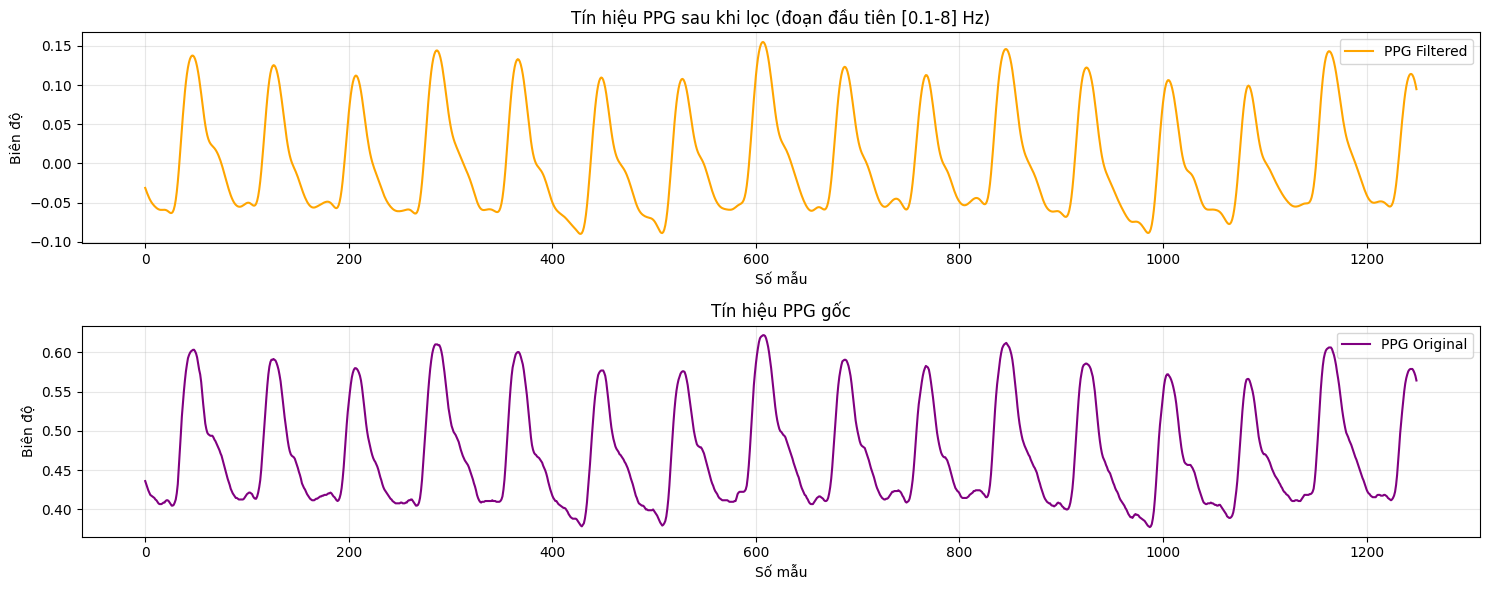

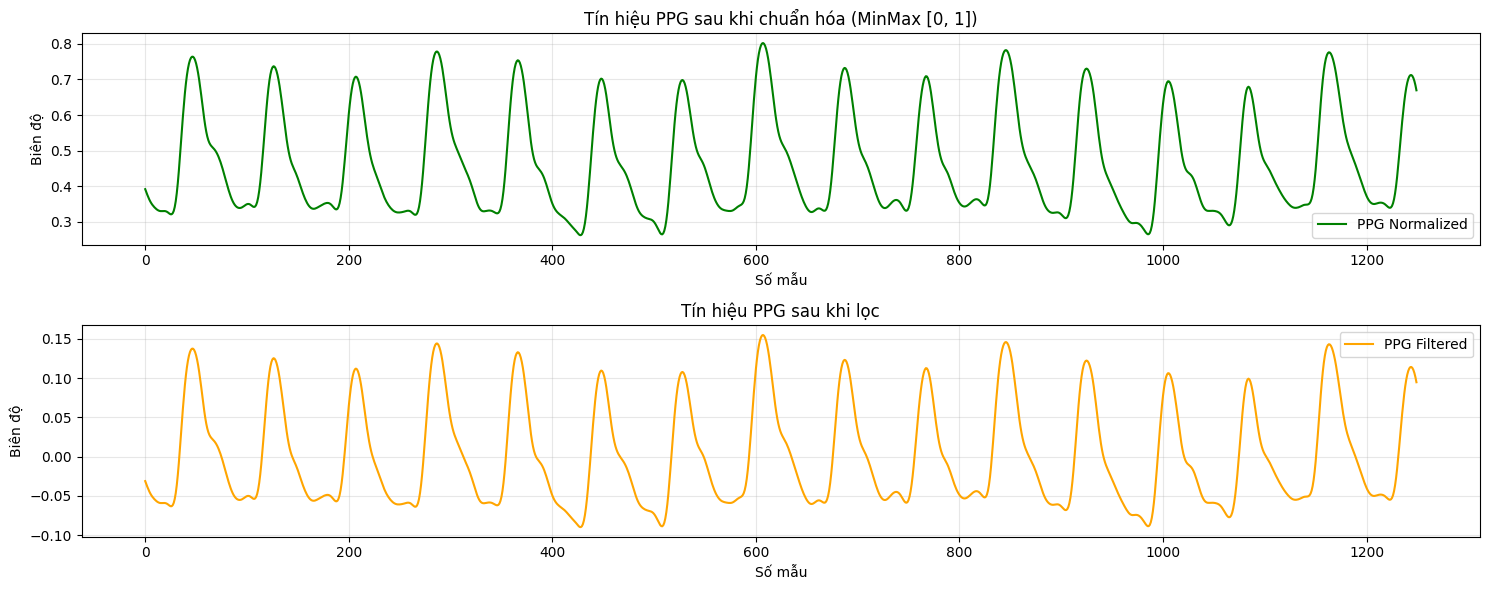

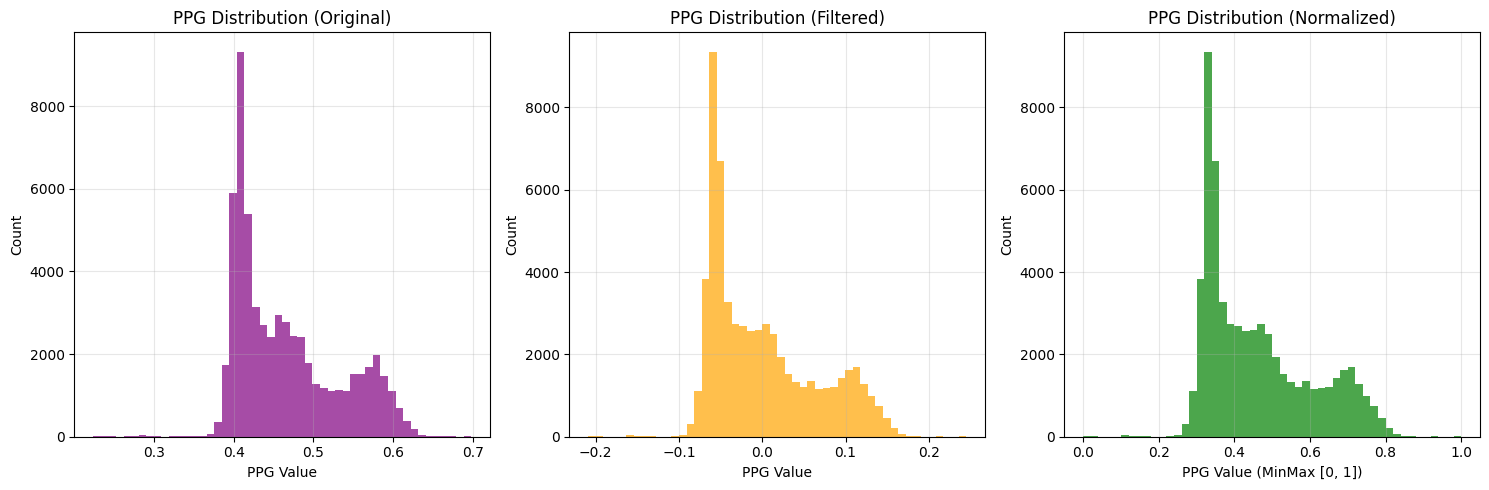


Thống kê tín hiệu PPG của bản ghi 1:
PPG gốc: mean = 0.4684, std = 0.1501, min = 0.1329, max = 0.9580
PPG sau khi lọc: mean = -0.0000, std = 0.1489, min = -0.4077, max = 0.4914
PPG sau khi chuẩn hóa: mean = 0.4534, std = 0.1657, min = 0.0000, max = 1.0000


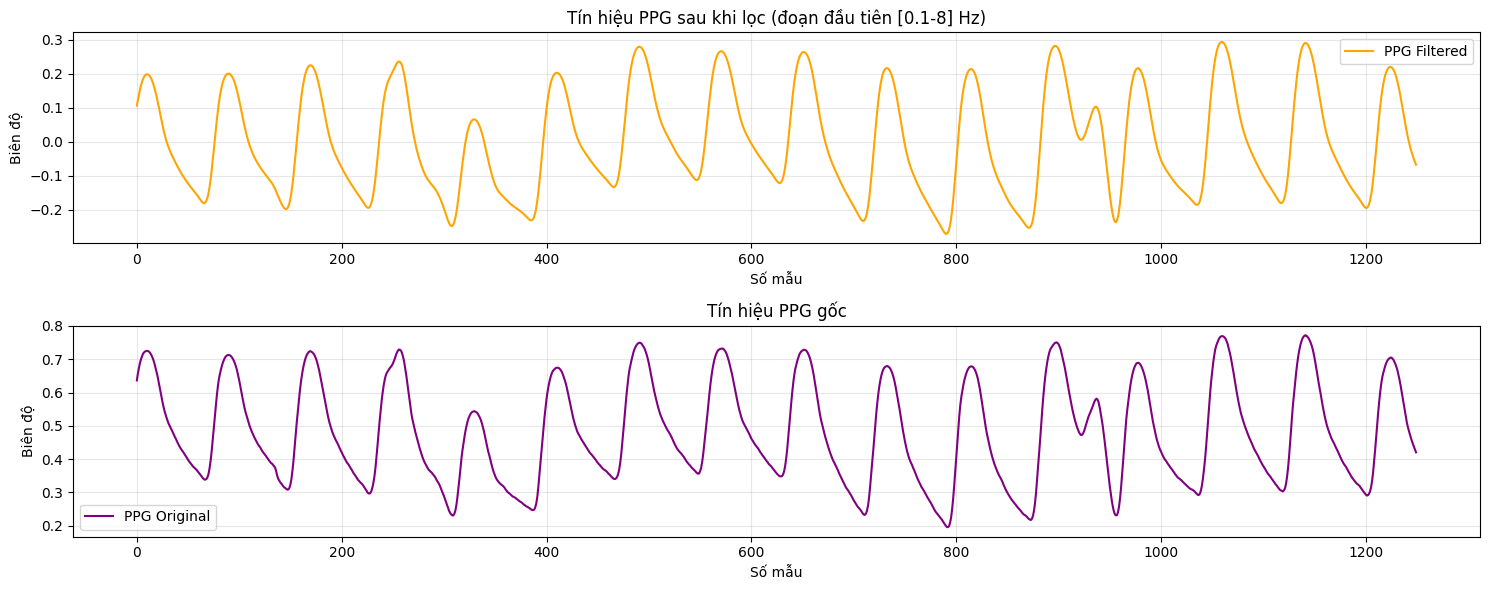

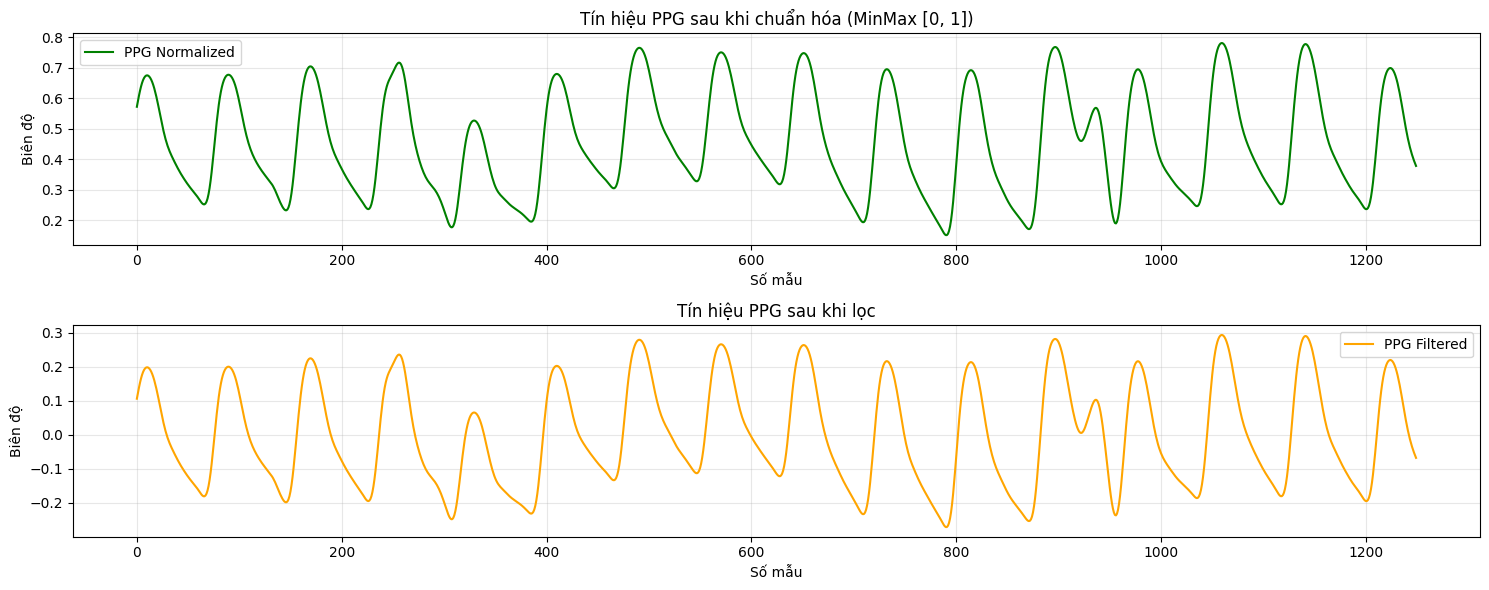

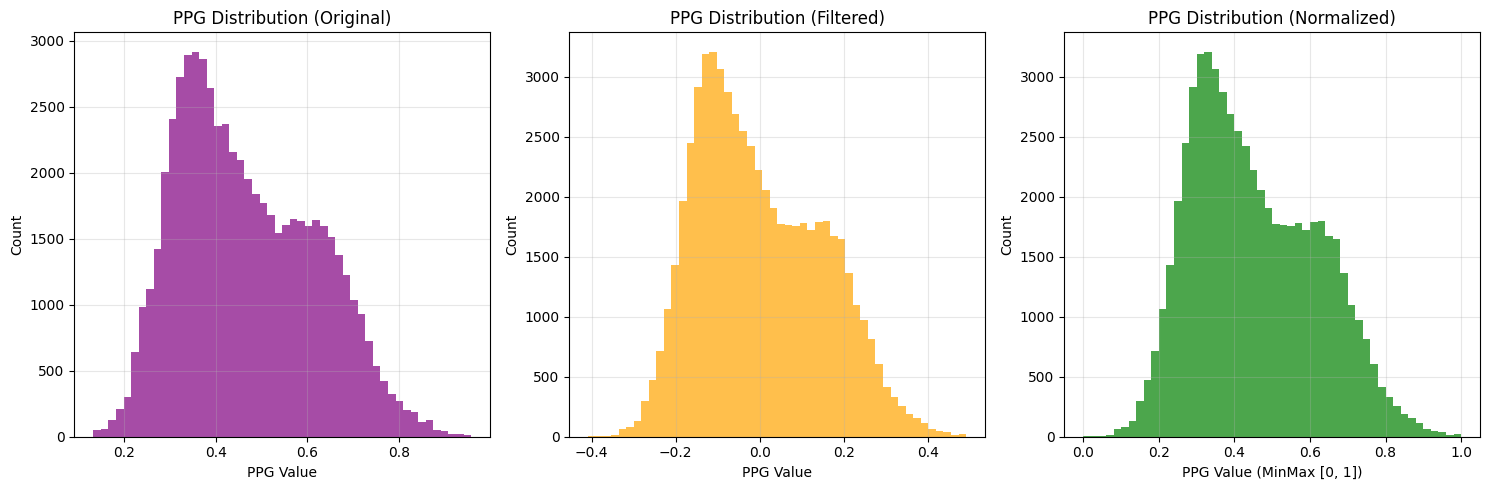

In [108]:
# Bước 4: Vẽ biểu đồ so sánh tín hiệu PPG trước và sau xử lý (cho 2 bản ghi đầu tiên)
for i, record in enumerate(valid_records[:2]):
    try:
        ppg = record['ppg']
        if len(ppg) == 0:
            print(f"Bản ghi {i} không có tín hiệu PPG, bỏ qua")
            continue

        # Lọc tín hiệu PPG
        ppg_filtered = signal.filtfilt(b, a, ppg)

        # Chuẩn hóa tín hiệu PPG về [0, 1]
        ppg_normalized = ppg_scaler.fit_transform(ppg_filtered.reshape(-1, 1)).flatten()

        # Thống kê tín hiệu PPG trước và sau xử lý
        print(f"\nThống kê tín hiệu PPG của bản ghi {i}:")
        print(f"PPG gốc: mean = {np.mean(ppg):.4f}, std = {np.std(ppg):.4f}, min = {np.min(ppg):.4f}, max = {np.max(ppg):.4f}")
        print(f"PPG sau khi lọc: mean = {np.mean(ppg_filtered):.4f}, std = {np.std(ppg_filtered):.4f}, min = {np.min(ppg_filtered):.4f}, max = {np.max(ppg_filtered):.4f}")
        print(f"PPG sau khi chuẩn hóa: mean = {np.mean(ppg_normalized):.4f}, std = {np.std(ppg_normalized):.4f}, min = {np.min(ppg_normalized):.4f}, max = {np.max(ppg_normalized):.4f}")

        # Vẽ biểu đồ so sánh tín hiệu PPG trước và sau khi lọc
        plt.figure(figsize=(15, 6))
        plt.subplot(2, 1, 1)
        plt.plot(ppg_filtered[:1250], label='PPG Filtered', color='orange')
        plt.title('Tín hiệu PPG sau khi lọc (đoạn đầu tiên [0.1-8] Hz)')
        plt.xlabel('Số mẫu')
        plt.ylabel('Biên độ')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(2, 1, 2)
        plt.plot(ppg[:1250], label='PPG Original', color='purple')
        plt.title('Tín hiệu PPG gốc')
        plt.xlabel('Số mẫu')
        plt.ylabel('Biên độ')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Vẽ biểu đồ so sánh tín hiệu PPG sau khi lọc và sau khi chuẩn hóa
        plt.figure(figsize=(15, 6))
        plt.subplot(2, 1, 1)
        plt.plot(ppg_normalized[:1250], label='PPG Normalized', color='green')
        plt.title('Tín hiệu PPG sau khi chuẩn hóa (MinMax [0, 1])')
        plt.xlabel('Số mẫu')
        plt.ylabel('Biên độ')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(2, 1, 2)
        plt.plot(ppg_filtered[:1250], label='PPG Filtered', color='orange')
        plt.title('Tín hiệu PPG sau khi lọc')
        plt.xlabel('Số mẫu')
        plt.ylabel('Biên độ')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Vẽ biểu đồ phân bố của PPG trước và sau xử lý
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.hist(ppg, bins=50, alpha=0.7, color='purple')
        plt.title('PPG Distribution (Original)')
        plt.xlabel('PPG Value')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 3, 2)
        plt.hist(ppg_filtered, bins=50, alpha=0.7, color='orange')
        plt.title('PPG Distribution (Filtered)')
        plt.xlabel('PPG Value')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 3, 3)
        plt.hist(ppg_normalized, bins=50, alpha=0.7, color='green')
        plt.title('PPG Distribution (Normalized)')
        plt.xlabel('PPG Value (MinMax [0, 1])')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Lỗi khi vẽ biểu đồ tín hiệu PPG cho bản ghi {i}: {e}")



In [109]:
# Bước 5: Phân đoạn tín hiệu PPG
print("Đang phân đoạn tín hiệu PPG...")
step = int(segment_length * (1 - 0.5))  # Bước trượt: 50% overlap
num_segments = 0

for j, record in enumerate(valid_records):
    try:
        ppg = record['ppg']
        hr_values = record['hr']
        rr_values = record['rr']
        ppg_fs = record['ppg_fs']

        if len(ppg) == 0 or len(hr_values) == 0 or len(rr_values) == 0:
            print(f"Bản ghi {j} thiếu dữ liệu, bỏ qua")
            continue

        # Lọc tín hiệu PPG
        ppg_filtered = signal.filtfilt(b, a, ppg)

        # Chuẩn hóa tín hiệu PPG về [0, 1]
        ppg_normalized = ppg_scaler.fit_transform(ppg_filtered.reshape(-1, 1)).flatten()

        # Chuẩn hóa HR và RR cho bản ghi này
        hr_values = hr_values.reshape(-1, 1)
        rr_values = rr_values.reshape(-1, 1)
        hr_norm = hr_scaler.transform(hr_values).flatten()
        rr_norm = rr_scaler.transform(rr_values).flatten()
        hr_norm = np.nan_to_num(hr_norm, nan=0.0)
        rr_norm = np.nan_to_num(rr_norm, nan=0.0)

        start = 0
        end = start + segment_length

        while end <= len(ppg):
            # Trích xuất đoạn tín hiệu PPG
            ppg_seg = ppg_normalized[start:end]
            if len(ppg_seg) != segment_length:
                break  # Bỏ qua nếu đoạn không đủ dài

            # Trích xuất HR và RR tương ứng
            time_start = start / ppg_fs  # Thời gian bắt đầu (giây)
            time_end = end / ppg_fs  # Thời gian kết thúc (giây)
            hr_indices = np.where((np.arange(len(hr_values)) * (1.0 / ppg_fs) >= time_start) & (np.arange(len(hr_values)) * (1.0 / ppg_fs) < time_end))[0]
            rr_indices = np.where((np.arange(len(rr_values)) * (1.0 / ppg_fs) >= time_start) & (np.arange(len(rr_values)) * (1.0 / ppg_fs) < time_end))[0]

            hr_seg = np.mean(hr_norm[hr_indices]) if len(hr_indices) > 0 else hr_norm[0]
            rr_seg = np.mean(rr_norm[rr_indices]) if len(rr_indices) > 0 else rr_norm[0]

            ppg_segments.append(ppg_seg)
            hr_segments.append(hr_seg)
            rr_segments.append(rr_seg)

            start += step
            end += step
            num_segments += 1

        print(f"Đã xử lý bản ghi {j}")

    except Exception as e:
        print(f"Lỗi khi phân đoạn tín hiệu PPG cho bản ghi {j}: {e}")

print(f"Số đoạn tín hiệu: {num_segments}")

# Kiểm tra nếu không có đoạn tín hiệu nào được tạo
if num_segments == 0:
    print("Không có đủ dữ liệu để tiếp tục. Sử dụng dữ liệu giả lập để minh họa.")
    num_samples = 100
    ppg_segments = np.random.rand(num_samples, segment_length)  # Giả lập tín hiệu PPG từ [0, 1]
    hr_segments = np.random.uniform(0, 1, num_samples)  # HR đã chuẩn hóa
    rr_segments = np.random.uniform(0, 1, num_samples)  # RR đã chuẩn hóa
    print(f"Đã tạo {num_samples} mẫu dữ liệu giả lập.")



Đang phân đoạn tín hiệu PPG...
Đã xử lý bản ghi 0
Đã xử lý bản ghi 1
Đã xử lý bản ghi 2
Đã xử lý bản ghi 3
Đã xử lý bản ghi 4
Đã xử lý bản ghi 5
Đã xử lý bản ghi 6
Đã xử lý bản ghi 7
Đã xử lý bản ghi 8
Đã xử lý bản ghi 9
Đã xử lý bản ghi 10
Đã xử lý bản ghi 11
Đã xử lý bản ghi 12
Đã xử lý bản ghi 13
Đã xử lý bản ghi 14
Đã xử lý bản ghi 15
Đã xử lý bản ghi 16
Đã xử lý bản ghi 17
Đã xử lý bản ghi 18
Đã xử lý bản ghi 19
Đã xử lý bản ghi 20
Đã xử lý bản ghi 21
Đã xử lý bản ghi 22
Đã xử lý bản ghi 23
Đã xử lý bản ghi 24
Đã xử lý bản ghi 25
Đã xử lý bản ghi 26
Đã xử lý bản ghi 27
Đã xử lý bản ghi 28
Đã xử lý bản ghi 29
Đã xử lý bản ghi 30
Đã xử lý bản ghi 31
Đã xử lý bản ghi 32
Đã xử lý bản ghi 33
Đã xử lý bản ghi 34
Đã xử lý bản ghi 35
Đã xử lý bản ghi 36
Đã xử lý bản ghi 37
Đã xử lý bản ghi 38
Đã xử lý bản ghi 39
Đã xử lý bản ghi 40
Đã xử lý bản ghi 41
Đã xử lý bản ghi 42
Đã xử lý bản ghi 43
Đã xử lý bản ghi 44
Đã xử lý bản ghi 45
Đã xử lý bản ghi 46
Đã xử lý bản ghi 47
Đã xử lý bản ghi 48

In [110]:
# Bước 6: Chuyển dữ liệu thành mảng numpy
ppg_segments = np.array(ppg_segments)
hr_segments = np.array(hr_segments)
rr_segments = np.array(rr_segments)

# Thống kê sau khi phân đoạn
print("\nThống kê sau khi phân đoạn:")
print(f"PPG segments: mean = {np.mean(ppg_segments):.4f}, std = {np.std(ppg_segments):.4f}, min = {np.min(ppg_segments):.4f}, max = {np.max(ppg_segments):.4f}")
print(f"HR segments: mean = {np.mean(hr_segments):.4f}, std = {np.std(hr_segments):.4f}, min = {np.min(hr_segments):.4f}, max = {np.max(hr_segments):.4f}")
print(f"RR segments: mean = {np.mean(rr_segments):.4f}, std = {np.std(rr_segments):.4f}, min = {np.min(rr_segments):.4f}, max = {np.max(rr_segments):.4f}")




Thống kê sau khi phân đoạn:
PPG segments: mean = 0.4767, std = 0.1607, min = 0.0000, max = 1.0000
HR segments: mean = 0.4151, std = 0.2025, min = 0.0000, max = 1.0000
RR segments: mean = 0.6460, std = 0.1737, min = 0.0000, max = 1.0000


In [111]:
# Bước 7: Chia dữ liệu thành tập train/test (80/20)
train_size = int(0.8 * len(ppg_segments))
indices = np.random.permutation(len(ppg_segments))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = ppg_segments[train_indices]
X_test = ppg_segments[test_indices]
hr_train = hr_segments[train_indices]
hr_test = hr_segments[test_indices]
rr_train = rr_segments[train_indices]
rr_test = rr_segments[test_indices]

In [112]:
# Bước 8: Lưu dữ liệu đã tiền xử lý
np.save(os.path.join(processed_data_path, 'ppg_train.npy'), X_train)
np.save(os.path.join(processed_data_path, 'ppg_test.npy'), X_test)
np.save(os.path.join(processed_data_path, 'hr_train.npy'), hr_train)
np.save(os.path.join(processed_data_path, 'hr_test.npy'), hr_test)
np.save(os.path.join(processed_data_path, 'rr_train.npy'), rr_train)
np.save(os.path.join(processed_data_path, 'rr_test.npy'), rr_test)

# Lưu các scaler để sử dụng trong các bước sau (giải chuẩn hóa)
import pickle
with open(os.path.join(processed_data_path, 'hr_scaler.pkl'), 'wb') as f:
    pickle.dump(hr_scaler, f)
with open(os.path.join(processed_data_path, 'rr_scaler.pkl'), 'wb') as f:
    pickle.dump(rr_scaler, f)

print("Đã lưu dữ liệu đã tiền xử lý tại:", processed_data_path)
print("Đã lưu các scaler tại:", processed_data_path)

Đã lưu dữ liệu đã tiền xử lý tại: /content/drive/MyDrive/bidmc/processed
Đã lưu các scaler tại: /content/drive/MyDrive/bidmc/processed


In [113]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Đường dẫn đến dữ liệu và lưu trữ
processed_data_path = '/content/drive/MyDrive/bidmc/processed'
model_path = '/content/drive/MyDrive/bidmc/models'
figures_path = '/content/drive/MyDrive/bidmc/figures'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(model_path, exist_ok=True)
os.makedirs(figures_path, exist_ok=True)

# Tải dữ liệu đã tiền xử lý
print("Đang tải dữ liệu đã tiền xử lý...")
X_train = np.load(os.path.join(processed_data_path, 'ppg_train.npy'))
X_test = np.load(os.path.join(processed_data_path, 'ppg_test.npy'))
hr_train = np.load(os.path.join(processed_data_path, 'hr_train.npy'))
hr_test = np.load(os.path.join(processed_data_path, 'hr_test.npy'))
rr_train = np.load(os.path.join(processed_data_path, 'rr_train.npy'))
rr_test = np.load(os.path.join(processed_data_path, 'rr_test.npy'))

print(f"Kích thước dữ liệu huấn luyện: {X_train.shape}")
print(f"Kích thước dữ liệu kiểm thử: {X_test.shape}")

# Tham số mô hình
input_dim = X_train.shape[1]  # Độ dài đoạn tín hiệu PPG
condition_dim = 2  # HR và RR
latent_dim = 64  # Kích thước không gian tiềm ẩn
hidden_units = [1024, 512, 256]  # Số đơn vị ẩn trong các lớp (theo mô hình của bạn)
batch_size = 128
epochs = 500
learning_rate = 0.0001

# Định nghĩa lớp Sampling
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Xây dựng mô hình CVAE cải tiến
class StandardCVAE(tf.keras.Model):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_units):
        super(StandardCVAE, self).__init__()
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_units = hidden_units

        # Encoder cải tiến
        encoder_inputs = layers.Input(shape=(input_dim,), name='encoder_input')
        condition_inputs = layers.Input(shape=(condition_dim,), name='condition_input')
        x = layers.Concatenate()([encoder_inputs, condition_inputs])
        for units in hidden_units:
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        z_mean = layers.Dense(latent_dim, name='z_mean')(x)
        z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
        z = Sampling()([z_mean, z_log_var])
        self.encoder = Model([encoder_inputs, condition_inputs], [z_mean, z_log_var, z], name='encoder')

        # Decoder cải tiến
        latent_inputs = layers.Input(shape=(latent_dim,), name='latent_input')
        condition_inputs_decoder = layers.Input(shape=(condition_dim,), name='condition_input_decoder')
        x = layers.Concatenate()([latent_inputs, condition_inputs_decoder])
        for units in reversed(hidden_units):
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)
        self.decoder = Model([latent_inputs, condition_inputs_decoder], decoder_outputs, name='decoder')

        # Metrics
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def call(self, inputs):
        x, condition = inputs
        z_mean, z_log_var, z = self.encoder([x, condition])
        return self.decoder([z, condition])

# Xây dựng mô hình
print("Đang xây dựng mô hình Standard CVAE...")
cvae = StandardCVAE(input_dim, condition_dim, latent_dim, hidden_units)

# Biên dịch mô hình
cvae.compile(optimizer=Adam(learning_rate=learning_rate))

# Vẽ sơ đồ mô hình
print("\nĐang vẽ sơ đồ mô hình...")
plot_model(cvae.encoder, to_file=os.path.join(figures_path, 'standard_cvae_encoder_architecture.png'), show_shapes=True, show_layer_names=True)
plot_model(cvae.decoder, to_file=os.path.join(figures_path, 'standard_cvae_decoder_architecture.png'), show_shapes=True, show_layer_names=True)
print(f"Đã lưu sơ đồ mô hình tại: {os.path.join(figures_path, 'standard_cvae_encoder_architecture.png')} và {os.path.join(figures_path, 'standard_cvae_decoder_architecture.png')}")

# Tóm tắt mô hình
print("\nTóm tắt mô hình Encoder:")
cvae.encoder.summary()
print("\nTóm tắt mô hình Decoder:")
cvae.decoder.summary()

# Lưu thông tin mô hình
with open(os.path.join(model_path, 'standard_cvae_architecture_info.txt'), 'w') as f:
    f.write("THÔNG TIN KIẾN TRÚC MÔ HÌNH Standard CVAE\n")
    f.write("=====================================\n\n")

    f.write("Tham số mô hình:\n")
    f.write(f"- Kích thước đầu vào: {input_dim}\n")
    f.write(f"- Kích thước điều kiện: {condition_dim}\n")
    f.write(f"- Kích thước không gian tiềm ẩn: {latent_dim}\n")
    f.write(f"- Số đơn vị ẩn trong các lớp: {hidden_units}\n")
    f.write(f"- Kích thước batch: {batch_size}\n")
    f.write(f"- Số epoch: {epochs}\n")
    f.write(f"- Tốc độ học: {learning_rate}\n\n")

    f.write("Kích thước dữ liệu:\n")
    f.write(f"- Tập huấn luyện: {X_train.shape[0]} mẫu\n")
    f.write(f"- Tập kiểm thử: {X_test.shape[0]} mẫu\n\n")

    f.write("Đường dẫn đến sơ đồ mô hình:\n")
    f.write(f"- Sơ đồ encoder: {os.path.join(figures_path, 'standard_cvae_encoder_architecture.png')}\n")
    f.write(f"- Sơ đồ decoder: {os.path.join(figures_path, 'standard_cvae_decoder_architecture.png')}\n")

print("\nMô hình Standard CVAE đã được xây dựng và kiến trúc đã được lưu.")
print("Thông tin kiến trúc mô hình đã được lưu vào file standard_cvae_architecture_info.txt.")

Đang tải dữ liệu đã tiền xử lý...
Kích thước dữ liệu huấn luyện: (4028, 1250)
Kích thước dữ liệu kiểm thử: (1007, 1250)
Đang xây dựng mô hình Standard CVAE...

Đang vẽ sơ đồ mô hình...
Đã lưu sơ đồ mô hình tại: /content/drive/MyDrive/bidmc/figures/standard_cvae_encoder_architecture.png và /content/drive/MyDrive/bidmc/figures/standard_cvae_decoder_architecture.png

Tóm tắt mô hình Encoder:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input             │ (None, 1250)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition_input           │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_26            │ (None, 1252)           │              0 │ encoder_input[0][0],   │
│ (Concatenate)             │                        │                │ condition_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_89 (Dense)          │ (None, 1024)           │      1,283,072 │ concatenate_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_76    │ (None, 1024)           │          4,096 │ dense_89[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_72            │ (None, 1024)           │              0 │ batch_normalization_7… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_72 (Dropout)      │ (None, 1024)           │              0 │ leaky_re_lu_72[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_90 (Dense)          │ (None, 512)            │        524,800 │ dropout_72[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_77    │ (None, 512)            │          2,048 │ dense_90[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_73            │ (None, 512)            │              0 │ batch_normalization_7… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_73 (Dropout)      │ (None, 512)            │              0 │ leaky_re_lu_73[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_91 (Dense)          │ (None, 256)            │        131,328 │ dropout_73[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_78    │ (None, 256)            │          1,024 │ dense_91[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_74            │ (None, 256)            │              0 │ batch_normalization_7… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_74 (Dropout)      │ (None, 256)            │              0 │ leaky_re_lu_74[0][0]   │
├──────────────────────

 Total params: 1,979,264 (7.55 MB)

 Trainable params: 1,975,680 (7.54 MB)

 Non-trainable params: 3,584 (14.00 KB)


Tóm tắt mô hình Decoder:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ latent_input (InputLayer) │ (None, 64)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition_input_decoder   │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_27            │ (None, 66)             │              0 │ latent_input[0][0],    │
│ (Concatenate)             │                        │                │ condition_input_decod… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_92 (Dense)          │ (None, 256)            │         17,152 │ concatenate_27[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_79    │ (None, 256)            │          1,024 │ dense_92[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_75            │ (None, 256)            │              0 │ batch_normalization_7… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_75 (Dropout)      │ (None, 256)            │              0 │ leaky_re_lu_75[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_93 (Dense)          │ (None, 512)            │        131,584 │ dropout_75[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_80    │ (None, 512)            │          2,048 │ dense_93[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_76            │ (None, 512)            │              0 │ batch_normalization_8… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_76 (Dropout)      │ (None, 512)            │              0 │ leaky_re_lu_76[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_94 (Dense)          │ (None, 1024)           │        525,312 │ dropout_76[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_81    │ (None, 1024)           │          4,096 │ dense_94[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_77            │ (None, 1024)           │              0 │ batch_normalization_8… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_77 (Dropout)      │ (None, 1024)           │              0 │ leaky_re_lu_77[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_95 (Dense)     

 Total params: 1,962,466 (7.49 MB)

 Trainable params: 1,958,882 (7.47 MB)

 Non-trainable params: 3,584 (14.00 KB)


Mô hình Standard CVAE đã được xây dựng và kiến trúc đã được lưu.
Thông tin kiến trúc mô hình đã được lưu vào file standard_cvae_architecture_info.txt.


# **train_cvae**

In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from scipy.signal import find_peaks
from scipy.fft import fft
import time
import shutil

# Đường dẫn đến dữ liệu và lưu trữ
processed_data_path = '/content/drive/MyDrive/bidmc/processed'
model_path = '/content/drive/MyDrive/bidmc/models'
figures_path = '/content/drive/MyDrive/bidmc/figures'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(processed_data_path, exist_ok=True)
os.makedirs(model_path, exist_ok=True)
os.makedirs(figures_path, exist_ok=True)

In [115]:
# Tải dữ liệu đã tiền xử lý từ bước trước
print("Đang tải dữ liệu đã tiền xử lý từ bước trước...")
X_train = np.load(os.path.join(processed_data_path, 'ppg_train.npy'))
X_test = np.load(os.path.join(processed_data_path, 'ppg_test.npy'))
hr_train = np.load(os.path.join(processed_data_path, 'hr_train.npy'))
hr_test = np.load(os.path.join(processed_data_path, 'hr_test.npy'))
rr_train = np.load(os.path.join(processed_data_path, 'rr_train.npy'))
rr_test = np.load(os.path.join(processed_data_path, 'rr_test.npy'))

print(f"Kích thước dữ liệu huấn luyện: {X_train.shape}")
print(f"Kích thước dữ liệu kiểm thử: {X_test.shape}")

# Chuẩn hóa dữ liệu
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
condition_train = tf.convert_to_tensor(np.column_stack((hr_train, rr_train)), dtype=tf.float32)
condition_test = tf.convert_to_tensor(np.column_stack((hr_test, rr_test)), dtype=tf.float32)
condition_train = (condition_train - tf.reduce_min(condition_train, axis=0)) / (tf.reduce_max(condition_train, axis=0) - tf.reduce_min(condition_train, axis=0))
condition_test = (condition_test - tf.reduce_min(condition_test, axis=0)) / (tf.reduce_max(condition_test, axis=0) - tf.reduce_min(condition_test, axis=0))

# Tham số mô hình cải tiến
input_dim = X_train.shape[1]  # 1250
condition_dim = 2  # HR và RR
latent_dim = 64
hidden_units = [1024, 512, 256]
batch_size = 128
epochs = 300
initial_learning_rate = 0.0001
decay_steps = 10000  # Số bước sau đó learning rate giảm
decay_rate = 0.96    # Tỷ lệ giảm learning rate



Đang tải dữ liệu đã tiền xử lý từ bước trước...
Kích thước dữ liệu huấn luyện: (4028, 1250)
Kích thước dữ liệu kiểm thử: (1007, 1250)


In [116]:
# Định nghĩa lớp Sampling
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Xây dựng mô hình CVAE cải tiến
class StandardCVAE(tf.keras.Model):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_units):
        super(StandardCVAE, self).__init__()
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_units = hidden_units

        # Encoder cải tiến
        encoder_inputs = layers.Input(shape=(input_dim,), name='encoder_input')
        condition_inputs = layers.Input(shape=(condition_dim,), name='condition_input')
        x = layers.Concatenate()([encoder_inputs, condition_inputs])
        for units in hidden_units:
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        z_mean = layers.Dense(latent_dim, name='z_mean')(x)
        z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
        z = Sampling()([z_mean, z_log_var])
        self.encoder = Model([encoder_inputs, condition_inputs], [z_mean, z_log_var, z], name='encoder')

        # Decoder cải tiến
        latent_inputs = layers.Input(shape=(latent_dim,), name='latent_input')
        condition_inputs_decoder = layers.Input(shape=(condition_dim,), name='condition_input_decoder')
        x = layers.Concatenate()([latent_inputs, condition_inputs_decoder])
        for units in reversed(hidden_units):
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)
        self.decoder = Model([latent_inputs, condition_inputs_decoder], decoder_outputs, name='decoder')

        # Metrics
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def call(self, inputs):
        x, condition = inputs
        z_mean, z_log_var, z = self.encoder([x, condition])
        return self.decoder([z, condition])

    def train_step(self, data):
        x, condition = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder([x, condition])
            reconstruction = self.decoder([z, condition])
            reconstruction_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(x, reconstruction)) * self.input_dim
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total_loss = reconstruction_loss + 0.5 * kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        grads = [tf.clip_by_value(g, -1.0, 1.0) if g is not None else g for g in grads]
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result()
        }

    def test_step(self, data):
        x, condition = data
        z_mean, z_log_var, z = self.encoder([x, condition])
        reconstruction = self.decoder([z, condition])
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(x, reconstruction)) * self.input_dim
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
        total_loss = reconstruction_loss + 0.5 * kl_loss
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result()
        }

    def generate(self, condition):
        condition = tf.convert_to_tensor(condition, dtype=tf.float32)
        batch_size = tf.shape(condition)[0]
        z = tf.random.normal(shape=(batch_size, self.latent_dim))
        return self.decoder([z, condition])

In [117]:
# Đánh giá và vẽ biểu đồ
def evaluate_and_plot(cvae, X_test, condition_test, figures_path, model_type='standard', fs=125):
    ppg_generated = cvae.generate(condition_test).numpy()
    mse = np.mean(np.square(X_test - ppg_generated))
    hr_extracted = [len(find_peaks(ppg, distance=fs*0.6)[0]) * (60 / 10) for ppg in ppg_generated]
    hr_mae = np.mean(np.abs(hr_extracted - hr_test))
    br_extracted = []
    for ppg in ppg_generated:
        fft_vals = np.abs(fft(ppg))
        freqs = np.fft.fftfreq(len(ppg), 1/fs)
        br_idx = (freqs > 0.1) & (freqs < 0.5)
        br = freqs[np.argmax(fft_vals[br_idx])] * 60 if np.any(br_idx) else 0
        br_extracted.append(br)
    br_mae = np.mean(np.abs(br_extracted - rr_test))
    print(f"STANDARD - MSE: {mse:.4f}, HR MAE: {hr_mae:.2f} bpm, BR MAE: {br_mae:.2f} breaths/min")
    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(3, 2, 2*i+1)
        plt.plot(X_test[i], label=f'Real PPG (HR={hr_test[i]:.1f}, BR={rr_test[i]:.1f})')
        plt.legend()
        plt.subplot(3, 2, 2*i+2)
        plt.plot(ppg_generated[i], label=f'Gen PPG (HR={hr_extracted[i]:.1f}, BR={br_extracted[i]:.1f})', color='orange')
        plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, 'standard_ppg_comparison.png'))
    plt.show()  # Hiển thị biểu đồ trên output
    return mse, hr_mae, br_mae

In [118]:
# Exponential Decay Learning Rate Scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# Xây dựng và huấn luyện mô hình Standard CVAE
print("\nĐ xây dựng mô hình Standard CVAE...")
cvae = StandardCVAE(input_dim, condition_dim, latent_dim, hidden_units)

# Xây dựng mô hình với kích thước đầu vào
cvae.build(input_shape=[(None, input_dim), (None, condition_dim)])
cvae.compile(optimizer=Adam(learning_rate=lr_schedule))

# Tạo dataset với shuffle
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, condition_train)).shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, condition_test)).batch(batch_size)

# Callbacks
log_dir = os.path.join(model_path, "logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Sửa checkpoint path để tránh xung đột
checkpoint_path = os.path.join(model_path, f"cvae_standard_checkpoint_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.weights.h5")
old_checkpoint = os.path.join(model_path, "cvae_standard_checkpoint.weights.h5")
if os.path.exists(old_checkpoint):
    backup_path = old_checkpoint + f".backup_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
    shutil.move(old_checkpoint, backup_path)
    print(f"Đã đổi tên tệp checkpoint cũ thành: {backup_path}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True
)

# Callback để ghi lại learning rate
class LrHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LrHistory, self).__init__()
        self.lr_history = []

    def on_epoch_end(self, epoch, logs=None):
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        self.lr_history.append(lr)

lr_history_callback = LrHistory()




Đ xây dựng mô hình Standard CVAE...


In [119]:
# Huấn luyện mô hình
print("\nBắt đầu huấn luyện mô hình Standard CVAE...")
start_time = time.time()
history = cvae.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset,
    callbacks=[tensorboard_callback, checkpoint_callback, early_stopping_callback, lr_history_callback],
    verbose=1
)
training_time = time.time() - start_time
print(f"\nHuấn luyện Standard CVAE hoàn tất trong {training_time:.2f} giây.")

# Lưu mô hình
cvae.save_weights(os.path.join(model_path, 'cvae_standard_final.weights.h5'))
print(f"Đã lưu mô hình Standard CVAE tại: {os.path.join(model_path, 'cvae_standard_final.weights.h5')}")




Bắt đầu huấn luyện mô hình Standard CVAE...
Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - kl_loss: 1.0449 - loss: 34.4951 - reconstruction_loss: 33.9726 - val_kl_loss: 0.0929 - val_loss: 32.1164 - val_reconstruction_loss: 32.0699
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - kl_loss: 0.0833 - loss: 33.1256 - reconstruction_loss: 33.0840 - val_kl_loss: 0.0625 - val_loss: 31.8847 - val_reconstruction_loss: 31.8535
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - kl_loss: 0.0671 - loss: 33.0118 - reconstruction_loss: 32.9783 - val_kl_loss: 0.0704 - val_loss: 31.7838 - val_reconstruction_loss: 31.7486
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - kl_loss: 0.0822 - loss: 32.5078 - reconstruction_loss: 32.4667 - val_kl_loss: 0.1088 - val_loss: 31.6669 - val_reconstruction_loss: 31.6125
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - kl_loss: 0.1272 - loss: 32.5315 - reconstruction_loss: 32.4679 - val_kl_loss: 0.1787 - val_loss: 31.5105 - val_reconstructi

# **analyze_fourier**

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import welch, find_peaks
from scipy.fft import fft, fftfreq
import pandas as pd
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

# Đường dẫn đến dữ liệu và kết quả
processed_data_path = '/content/drive/MyDrive/bidmc/processed'
model_path = '/content/drive/MyDrive/bidmc/models'
figures_path = '/content/drive/MyDrive/bidmc/figures/fourier'
results_path = '/content/drive/MyDrive/bidmc/results'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(figures_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

# Tải dữ liệu kiểm thử
print("Đang tải dữ liệu kiểm thử...")
X_test = np.load(os.path.join(processed_data_path, 'ppg_test.npy'))
hr_test = np.load(os.path.join(processed_data_path, 'hr_test.npy'))
rr_test = np.load(os.path.join(processed_data_path, 'rr_test.npy'))
print(f"Kích thước dữ liệu kiểm thử: {X_test.shape}")

# Chuẩn hóa dữ liệu kiểm thử
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
condition_test = tf.convert_to_tensor(np.column_stack((hr_test, rr_test)), dtype=tf.float32)
condition_test = (condition_test - tf.reduce_min(condition_test, axis=0)) / (tf.reduce_max(condition_test, axis=0) - tf.reduce_min(condition_test, axis=0))


# Tạo tín hiệu PPG từ mô hình
num_samples = 10
test_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_conditions = tf.gather(condition_test, test_indices)
original_ppg = X_test[test_indices]
generated_ppg = cvae.generate(test_conditions).numpy()

# Hàm phân tích phổ tần số sử dụng FFT và trích xuất HR/RR
def analyze_frequency_spectrum(signal, fs):
    n = len(signal)
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]
    yf_abs = 2.0/n * np.abs(yf[0:n//2])

    # Trích xuất HR (1-2 Hz ~ 60-120 bpm)
    hr_idx = (xf >= 1.0) & (xf <= 2.0)
    hr_freq = xf[hr_idx][np.argmax(yf_abs[hr_idx])] if np.any(hr_idx) else 0
    hr_est = hr_freq * 60  # Chuyển sang bpm

    # Trích xuất RR (0.1-0.5 Hz ~ 6-30 breaths/min)
    rr_idx = (xf >= 0.1) & (xf <= 0.5)
    rr_freq = xf[rr_idx][np.argmax(yf_abs[rr_idx])] if np.any(rr_idx) else 0
    rr_est = rr_freq * 60  # Chuyển sang breaths/min

    return xf, yf_abs, hr_est, rr_est

# Hàm phân tích phổ tần số sử dụng Welch's method
def analyze_welch_spectrum(signal, fs):
    f, Pxx = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    return f, Pxx

# Hàm tìm đỉnh trong phổ tần số
def find_peaks_spectrum(xf, yf, threshold=0.1, min_distance=5):
    peaks, _ = find_peaks(yf, height=threshold*np.max(yf), distance=min_distance)
    return [(idx, xf[idx], yf[idx]) for idx in peaks]

# Hàm tính toán các chỉ số đánh giá
def calculate_metrics(original, generated):
    mse = mean_squared_error(original, generated)
    max_val = max(np.max(original), np.max(generated))
    psnr = 20 * np.log10(max_val / np.sqrt(mse)) if mse > 0 else float('inf')
    corr = np.corrcoef(original, generated)[0, 1]
    return mse, psnr, corr

# Hàm tính toán MSE trong miền tần số
def calculate_frequency_metrics(f_orig, psd_orig, f_gen, psd_gen):
    from scipy.interpolate import interp1d
    f_min = max(np.min(f_orig), np.min(f_gen))
    f_max = min(np.max(f_orig), np.max(f_gen))
    f_common = np.linspace(f_min, f_max, 1000)
    interp_orig = interp1d(f_orig, psd_orig, bounds_error=False, fill_value=0)
    interp_gen = interp1d(f_gen, psd_gen, bounds_error=False, fill_value=0)
    psd_orig_interp = interp_orig(f_common)
    psd_gen_interp = interp_gen(f_common)
    return mean_squared_error(psd_orig_interp, psd_gen_interp)

# Phân tích phổ tần số chi tiết
print("\nPhân tích phổ tần số chi tiết của tín hiệu PPG gốc và tín hiệu PPG đã tạo")
results_df = pd.DataFrame(columns=[
    'Sample', 'HR_Real', 'RR_Real', 'HR_Gen', 'RR_Gen', 'MSE_Time', 'PSNR', 'Corr', 'MSE_Freq',
    'Orig_Peak1_Freq', 'Orig_Peak2_Freq', 'Orig_Peak3_Freq',
    'Gen_Peak1_Freq', 'Gen_Peak2_Freq', 'Gen_Peak3_Freq'
])

for i in range(num_samples):
    print(f"\nPhân tích mẫu {i+1}:")

    # Phân tích tín hiệu gốc
    xf_orig, yf_orig, hr_orig_est, rr_orig_est = analyze_frequency_spectrum(original_ppg[i], fs)
    f_orig, psd_orig = analyze_welch_spectrum(original_ppg[i], fs)
    peaks_orig = find_peaks_spectrum(xf_orig, yf_orig)[:3]

    # Phân tích tín hiệu đã tạo
    xf_gen, yf_gen, hr_gen_est, rr_gen_est = analyze_frequency_spectrum(generated_ppg[i], fs)
    f_gen, psd_gen = analyze_welch_spectrum(generated_ppg[i], fs)
    peaks_gen = find_peaks_spectrum(xf_gen, yf_gen)[:3]

    # Tính toán các chỉ số
    mse_time, psnr, corr = calculate_metrics(original_ppg[i], generated_ppg[i])
    mse_freq = calculate_frequency_metrics(f_orig, psd_orig, f_gen, psd_gen)

    # Lấy các đỉnh tần số
    orig_peaks_freq = [p[1] for p in peaks_orig] + [0]*(3-len(peaks_orig))
    gen_peaks_freq = [p[1] for p in peaks_gen] + [0]*(3-len(peaks_gen))

    # In kết quả
    print(f"HR Real={hr_test[test_indices[i]]:.2f}, RR Real={rr_test[test_indices[i]]:.2f}")
    print(f"HR Gen={hr_gen_est:.2f}, RR Gen={rr_gen_est:.2f}")
    print(f"MSE (time): {mse_time:.4f}, PSNR: {psnr:.2f}dB, Corr: {corr:.4f}, MSE (freq): {mse_freq:.4f}")

    # Thêm vào DataFrame
    new_row = pd.DataFrame({
        'Sample': [i+1],
        'HR_Real': [hr_test[test_indices[i]]],
        'RR_Real': [rr_test[test_indices[i]]],
        'HR_Gen': [hr_gen_est],
        'RR_Gen': [rr_gen_est],
        'MSE_Time': [mse_time],
        'PSNR': [psnr],
        'Corr': [corr],
        'MSE_Freq': [mse_freq],
        'Orig_Peak1_Freq': [orig_peaks_freq[0]],
        'Orig_Peak2_Freq': [orig_peaks_freq[1]],
        'Orig_Peak3_Freq': [orig_peaks_freq[2]],
        'Gen_Peak1_Freq': [gen_peaks_freq[0]],
        'Gen_Peak2_Freq': [gen_peaks_freq[1]],
        'Gen_Peak3_Freq': [gen_peaks_freq[2]]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(15, 10))

    # Tín hiệu thời gian
    plt.subplot(2, 2, 1)
    plt.plot(original_ppg[i], label='Original PPG')
    plt.plot(generated_ppg[i], label='Generated PPG', alpha=0.7)
    plt.title(f'Sample {i+1}: Time Domain (HR={hr_test[test_indices[i]]:.1f}, RR={rr_test[test_indices[i]]:.1f})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Phổ FFT
    plt.subplot(2, 2, 2)
    plt.plot(xf_orig, yf_orig, label='Original FFT')
    plt.plot(xf_gen, yf_gen, label='Generated FFT', alpha=0.7)
    plt.title('FFT Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 5])
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Phổ PSD
    plt.subplot(2, 2, 3)
    plt.semilogy(f_orig, psd_orig, label='Original PSD')
    plt.semilogy(f_gen, psd_gen, label='Generated PSD', alpha=0.7)
    plt.title('Power Spectral Density (Welch)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB/Hz)')
    plt.xlim([0, 5])
    plt.legend()
    plt.grid(True, alpha=0.3)

    # So sánh đỉnh
    plt.subplot(2, 2, 4)
    plt.scatter([p[1] for p in peaks_orig], [p[2] for p in peaks_orig], label='Orig Peaks', c='blue')
    plt.scatter([p[1] for p in peaks_gen], [p[2] for p in peaks_gen], label='Gen Peaks', c='orange', alpha=0.7)
    plt.title('Peak Frequencies')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 5])
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, f'sample_{i+1}_analysis.png'))
    plt.close()

# Lưu kết quả
results_df.to_csv(os.path.join(results_path, 'frequency_analysis_results_v2.csv'), index=False)
avg_metrics = results_df[['MSE_Time', 'PSNR', 'Corr', 'MSE_Freq']].mean()
print("\nKết quả trung bình:")
print(f"MSE (time): {avg_metrics['MSE_Time']:.4f}, PSNR: {avg_metrics['PSNR']:.2f}dB, Corr: {avg_metrics['Corr']:.4f}, MSE (freq): {avg_metrics['MSE_Freq']:.4f}")

# Lưu báo cáo
with open(os.path.join(results_path, 'fourier_analysis_results_v2.txt'), 'w') as f:
    f.write("PHÂN TÍCH BIẾN ĐỔI FOURIER (V2.2)\n")
    f.write("==============================\n\n")
    f.write(f"- Số mẫu: {num_samples}\n")
    f.write(f"- Kết quả trung bình: MSE (time): {avg_metrics['MSE_Time']:.4f}, PSNR: {avg_metrics['PSNR']:.2f}dB, Corr: {avg_metrics['Corr']:.4f}, MSE (freq): {avg_metrics['MSE_Freq']:.4f}\n\n")
    for i in range(len(results_df)):
        f.write(f"Mẫu {i+1}: HR Real={results_df['HR_Real'][i]:.2f}, RR Real={results_df['RR_Real'][i]:.2f}, HR Gen={results_df['HR_Gen'][i]:.2f}, RR Gen={results_df['RR_Gen'][i]:.2f}\n")
        f.write(f"  Metrics: MSE (time): {results_df['MSE_Time'][i]:.4f}, PSNR: {results_df['PSNR'][i]:.2f}dB, Corr: {results_df['Corr'][i]:.4f}, MSE (freq): {results_df['MSE_Freq'][i]:.4f}\n")
        f.write(f"  Peaks Orig: {results_df['Orig_Peak1_Freq'][i]:.2f}, {results_df['Orig_Peak2_Freq'][i]:.2f}, {results_df['Orig_Peak3_Freq'][i]:.2f} Hz\n")
        f.write(f"  Peaks Gen: {results_df['Gen_Peak1_Freq'][i]:.2f}, {results_df['Gen_Peak2_Freq'][i]:.2f}, {results_df['Gen_Peak3_Freq'][i]:.2f} Hz\n\n")

print(f"\nKết quả đã được lưu tại: {results_path}")

Đang tải dữ liệu kiểm thử...
Kích thước dữ liệu kiểm thử: (1007, 1250)

Phân tích phổ tần số chi tiết của tín hiệu PPG gốc và tín hiệu PPG đã tạo

Phân tích mẫu 1:
HR Real=0.19, RR Real=0.76
HR Gen=90.00, RR Gen=12.00
MSE (time): 0.0557, PSNR: 11.50dB, Corr: -0.1814, MSE (freq): 0.0000


<ipython-input-120-3b182ec988f9>:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)



Phân tích mẫu 2:
HR Real=0.00, RR Real=0.57
HR Gen=84.00, RR Gen=12.00
MSE (time): 0.0651, PSNR: 11.13dB, Corr: 0.0641, MSE (freq): 0.0000

Phân tích mẫu 3:
HR Real=0.43, RR Real=0.76
HR Gen=90.00, RR Gen=18.00
MSE (time): 0.0371, PSNR: 12.00dB, Corr: -0.5592, MSE (freq): 0.0000

Phân tích mẫu 4:
HR Real=0.43, RR Real=0.76
HR Gen=102.00, RR Gen=24.00
MSE (time): 0.0616, PSNR: 11.25dB, Corr: -0.1280, MSE (freq): 0.0000

Phân tích mẫu 5:
HR Real=0.60, RR Real=0.81
HR Gen=84.00, RR Gen=12.00
MSE (time): 0.0560, PSNR: 11.43dB, Corr: -0.1504, MSE (freq): 0.0000

Phân tích mẫu 6:
HR Real=0.49, RR Real=0.57
HR Gen=96.00, RR Gen=12.00
MSE (time): 0.0304, PSNR: 15.17dB, Corr: 0.5046, MSE (freq): 0.0000

Phân tích mẫu 7:
HR Real=0.81, RR Real=0.67
HR Gen=108.00, RR Gen=18.00
MSE (time): 0.0255, PSNR: 14.03dB, Corr: -0.0295, MSE (freq): 0.0000

Phân tích mẫu 8:
HR Real=0.32, RR Real=0.62
HR Gen=78.00, RR Gen=18.00
MSE (time): 0.0567, PSNR: 11.80dB, Corr: -0.0244, MSE (freq): 0.0000

Phân tích mẫ

# **visualize_and_evaluate**

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.signal import welch, find_peaks
from scipy.fft import fft, fftfreq
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

# Đường dẫn đến dữ liệu và kết quả
processed_data_path = '/content/drive/MyDrive/bidmc/processed'
model_path = '/content/drive/MyDrive/bidmc/models'
figures_path = '/content/drive/MyDrive/bidmc/figures/visualize'
results_path = '/content/drive/MyDrive/bidmc/results'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(figures_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

# Tải dữ liệu kiểm thử và huấn luyện (để giải chuẩn hóa)
print("Đang tải dữ liệu kiểm thử và huấn luyện...")
X_test = np.load(os.path.join(processed_data_path, 'ppg_test.npy'))
hr_test = np.load(os.path.join(processed_data_path, 'hr_test.npy'))
rr_test = np.load(os.path.join(processed_data_path, 'rr_test.npy'))
X_train = np.load(os.path.join(processed_data_path, 'ppg_train.npy'))
hr_train = np.load(os.path.join(processed_data_path, 'hr_train.npy'))
rr_train = np.load(os.path.join(processed_data_path, 'rr_train.npy'))
print(f"Kích thước dữ liệu kiểm thử: {X_test.shape}")

# Chuẩn hóa dữ liệu kiểm thử (khớp với train)
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
condition_test = tf.convert_to_tensor(np.column_stack((hr_test, rr_test)), dtype=tf.float32)
condition_test = (condition_test - tf.reduce_min(condition_test, axis=0)) / (tf.reduce_max(condition_test, axis=0) - tf.reduce_min(condition_test, axis=0))

# Giải chuẩn hóa HR và RR về giá trị thực tế
hr_min, hr_max = np.min(hr_train), np.max(hr_train)
rr_min, rr_max = np.min(rr_train), np.max(rr_train)
hr_test_real = hr_test * (hr_max - hr_min) + hr_min
rr_test_real = rr_test * (rr_max - rr_min) + rr_min


Đang tải dữ liệu kiểm thử và huấn luyện...
Kích thước dữ liệu kiểm thử: (1007, 1250)


In [122]:
# Tham số mô hình (khớp với train mới)
input_dim = X_test.shape[1]  # 1250
condition_dim = 2  # HR và RR
latent_dim = 64  # Khớp với train
hidden_units = [1024, 512, 256]  # Khớp với train
fs = 125  # Tần số lấy mẫu (Hz)

# Định nghĩa lớp Sampling
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [123]:
# Định nghĩa mô hình StandardCVAE
class StandardCVAE(tf.keras.Model):
    def __init__(self, input_dim, condition_dim, latent_dim, hidden_units):
        super(StandardCVAE, self).__init__()
        self.input_dim = input_dim
        self.condition_dim = condition_dim
        self.latent_dim = latent_dim
        self.hidden_units = hidden_units

        # Encoder
        encoder_inputs = layers.Input(shape=(input_dim,), name='encoder_input')
        condition_inputs = layers.Input(shape=(condition_dim,), name='condition_input')
        x = layers.Concatenate()([encoder_inputs, condition_inputs])
        for units in hidden_units:
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        z_mean = layers.Dense(latent_dim, name='z_mean')(x)
        z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
        z = Sampling()([z_mean, z_log_var])
        self.encoder = Model([encoder_inputs, condition_inputs], [z_mean, z_log_var, z], name='encoder')

        # Decoder
        latent_inputs = layers.Input(shape=(latent_dim,), name='latent_input')
        condition_inputs_decoder = layers.Input(shape=(condition_dim,), name='condition_input_decoder')
        x = layers.Concatenate()([latent_inputs, condition_inputs_decoder])
        for units in reversed(hidden_units):
            x = layers.Dense(units, kernel_initializer='glorot_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.LeakyReLU(negative_slope=0.2)(x)
            x = layers.Dropout(0.2)(x)
        decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)
        self.decoder = Model([latent_inputs, condition_inputs_decoder], decoder_outputs, name='decoder')

    def encode(self, inputs):
        return self.encoder(inputs)

    def generate(self, condition):
        condition = tf.convert_to_tensor(condition, dtype=tf.float32)
        batch_size = tf.shape(condition)[0]
        z = tf.random.normal(shape=(batch_size, self.latent_dim))
        return self.decoder([z, condition])



In [124]:
# Tải mô hình đã huấn luyện
print("Đang tải mô hình Standard CVAE đã huấn luyện...")
cvae = StandardCVAE(input_dim, condition_dim, latent_dim, hidden_units)
cvae.build(input_shape=[(None, input_dim), (None, condition_dim)])
cvae.load_weights(os.path.join(model_path, 'cvae_standard_final.weights.h5'))

# Tạo tín hiệu PPG và không gian tiềm ẩn
num_samples = 20
test_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_conditions = tf.gather(condition_test, test_indices)
original_ppg = X_test[test_indices]
generated_ppg = cvae.generate(test_conditions).numpy()
original_ppg_tensor = tf.convert_to_tensor(original_ppg, dtype=tf.float32)
z_mean, z_log_var, z = cvae.encode([original_ppg_tensor, test_conditions])

# Tải kết quả phân tích Fourier (giả định file đã được tạo trước)
print("Đang tải kết quả phân tích Fourier...")
fourier_results_path = os.path.join(results_path, 'frequency_analysis_results_v2.csv')
if os.path.exists(fourier_results_path):
    fourier_results = pd.read_csv(fourier_results_path)
    print(f"Đã tải kết quả phân tích Fourier: {len(fourier_results)} mẫu")
else:
    print("Không tìm thấy kết quả phân tích Fourier! Vui lòng tạo file trước.")

# Hàm phân tích phổ tần số
def analyze_frequency_spectrum(signal, fs):
    n = len(signal)
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]
    yf_abs = 2.0/n * np.abs(yf[0:n//2])
    return xf, yf_abs


Đang tải mô hình Standard CVAE đã huấn luyện...
Đang tải kết quả phân tích Fourier...
Đã tải kết quả phân tích Fourier: 10 mẫu



1. Trực quan hóa tín hiệu PPG gốc và tín hiệu tổng hợp


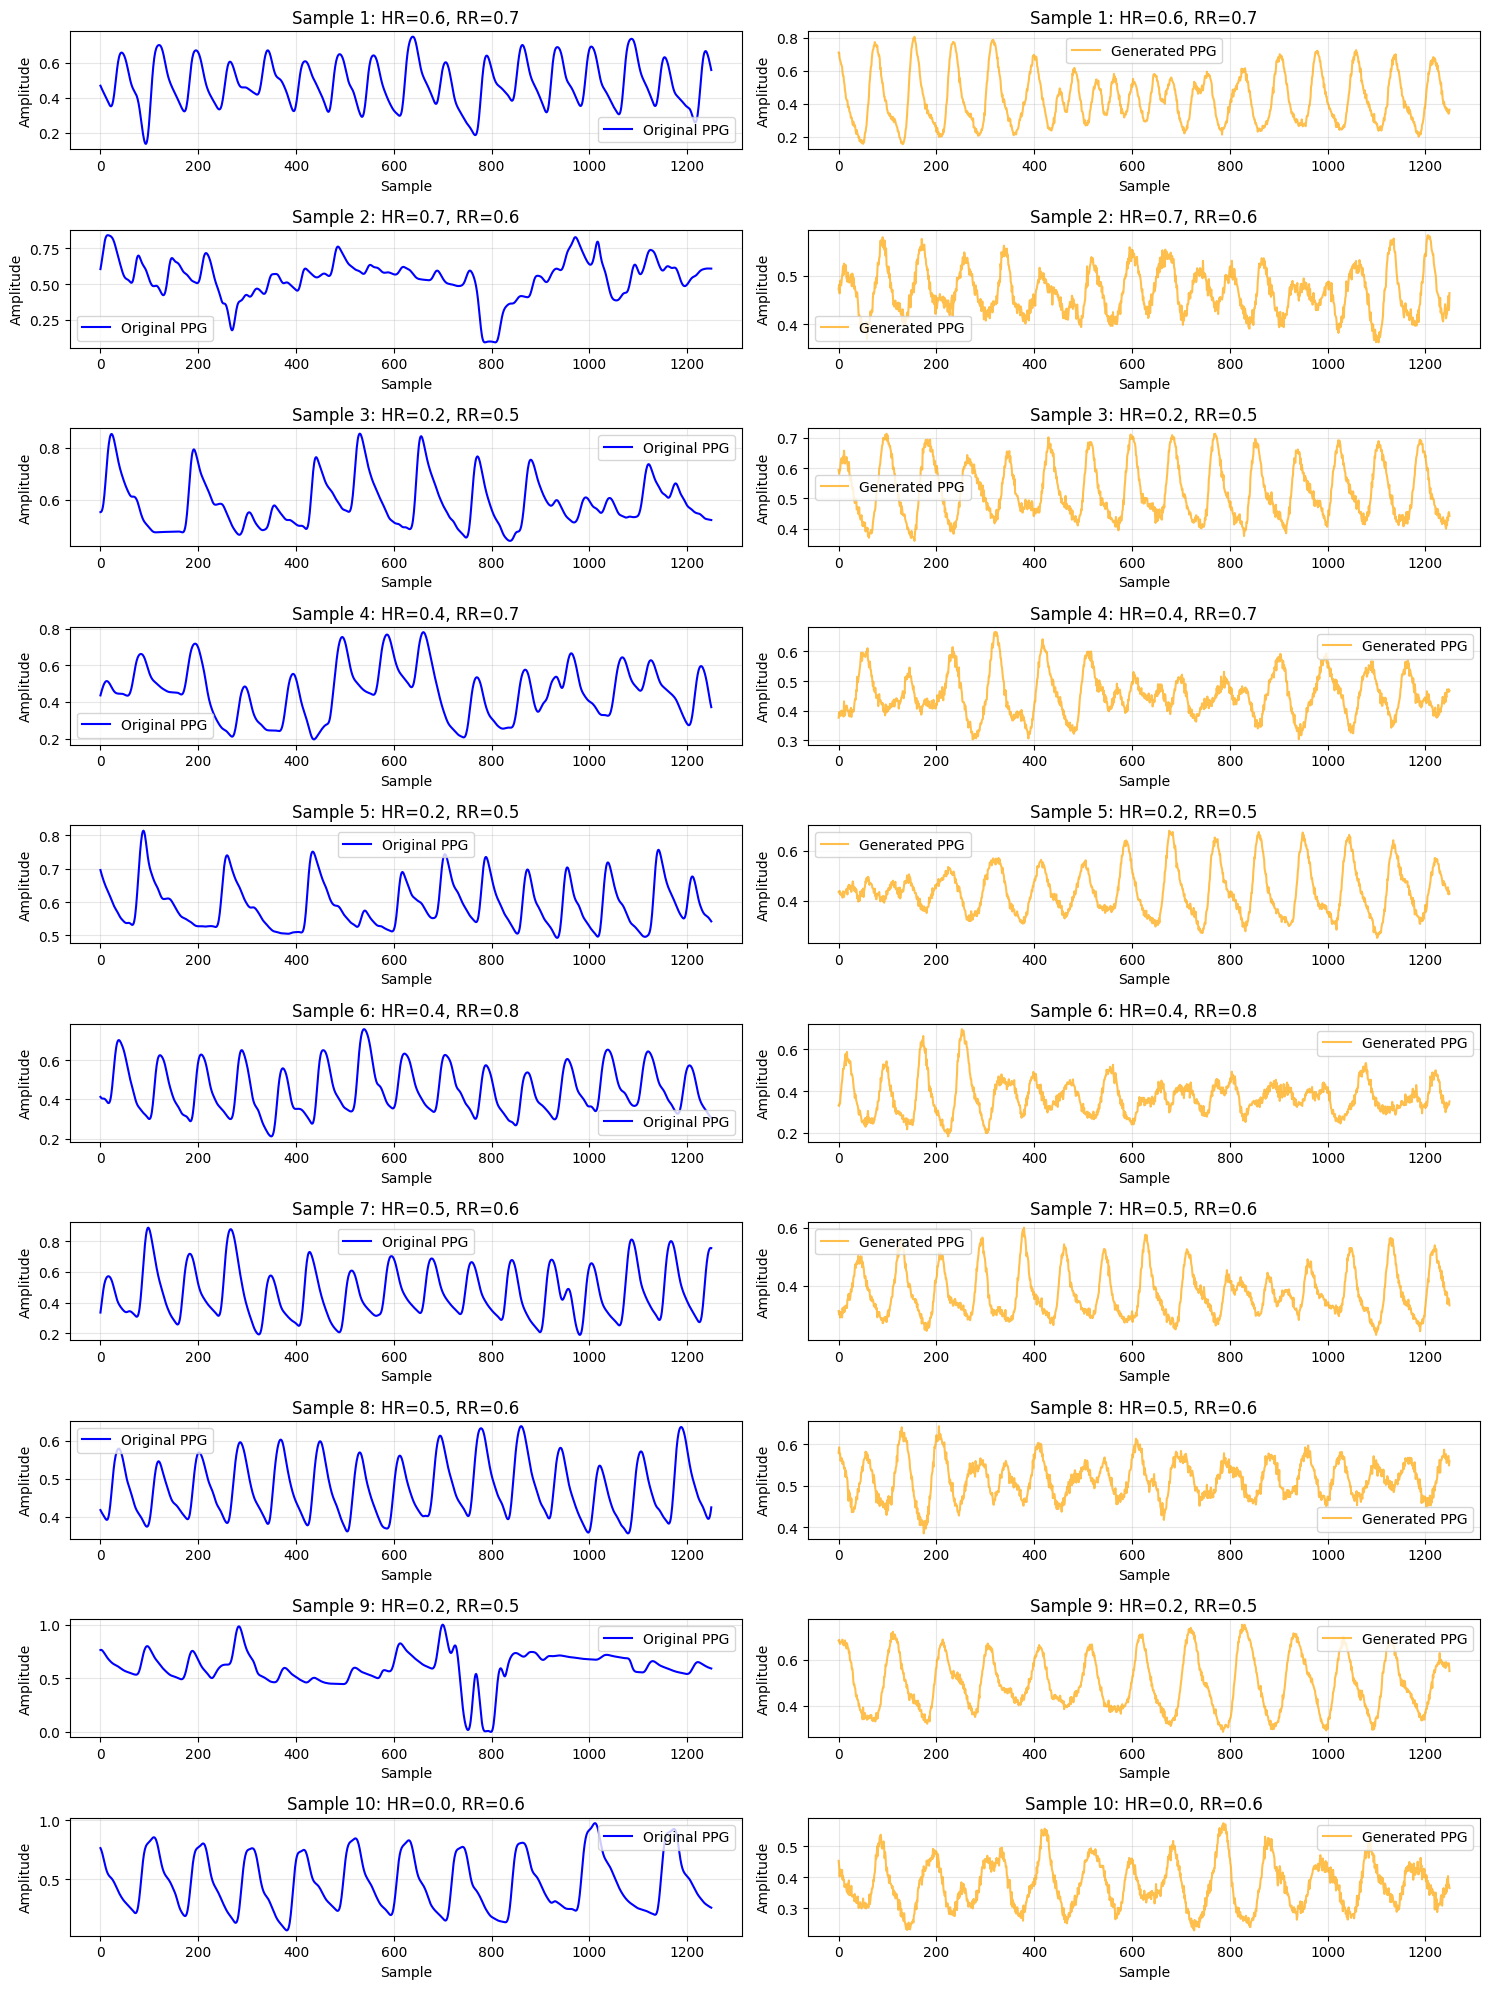

In [125]:
# 1. Trực quan hóa tín hiệu PPG gốc và tín hiệu tổng hợp
print("\n1. Trực quan hóa tín hiệu PPG gốc và tín hiệu tổng hợp")
plt.figure(figsize=(15, 20))
for i in range(min(10, num_samples)):
    plt.subplot(10, 2, 2*i+1)
    plt.plot(original_ppg[i], label='Original PPG', color='blue')
    plt.title(f'Sample {i+1}: HR={hr_test_real[test_indices[i]]:.1f}, RR={rr_test_real[test_indices[i]]:.1f}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(10, 2, 2*i+2)
    plt.plot(generated_ppg[i], label='Generated PPG', color='orange', alpha=0.7)
    plt.title(f'Sample {i+1}: HR={hr_test_real[test_indices[i]]:.1f}, RR={rr_test_real[test_indices[i]]:.1f}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'original_vs_generated_comparison_standard.png'))
plt.show()  # Hiển thị biểu đồ trên output


2. Trực quan hóa phân bố HR và RR


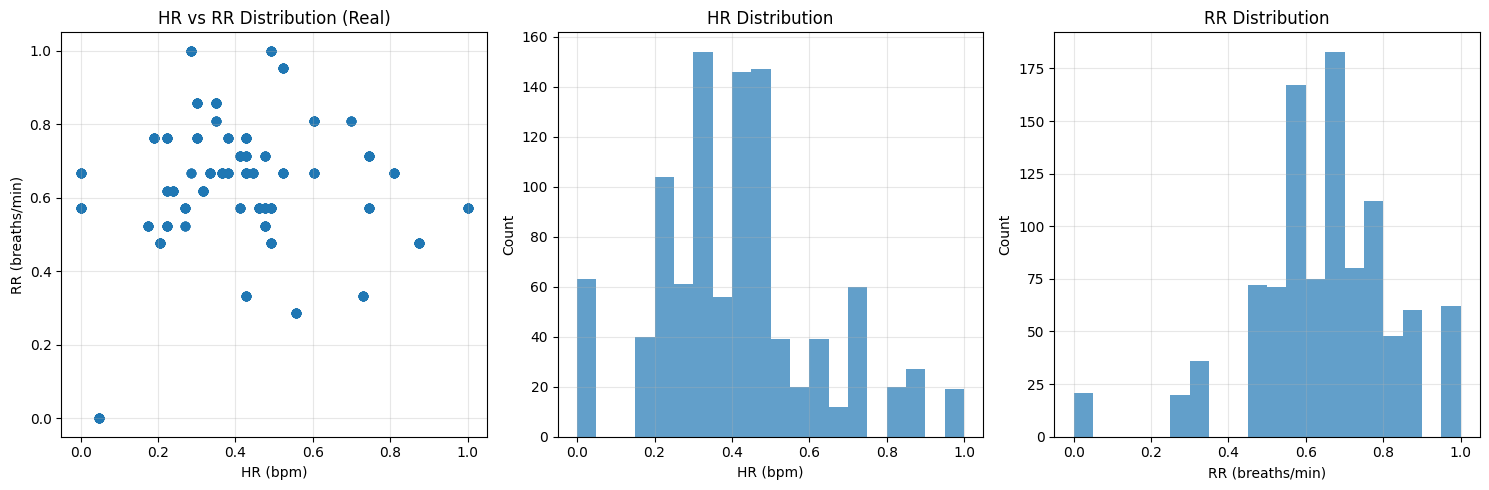

In [126]:
# 2. Trực quan hóa phân bố HR và RR thực tế
print("\n2. Trực quan hóa phân bố HR và RR")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(hr_test_real, rr_test_real, alpha=0.5)
plt.title('HR vs RR Distribution (Real)')
plt.xlabel('HR (bpm)')
plt.ylabel('RR (breaths/min)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(hr_test_real, bins=20, alpha=0.7)
plt.title('HR Distribution')
plt.xlabel('HR (bpm)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(rr_test_real, bins=20, alpha=0.7)
plt.title('RR Distribution')
plt.xlabel('RR (breaths/min)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'hr_rr_distribution_standard.png'))
plt.show()  # Hiển thị biểu đồ trên output


3. Trực quan hóa không gian tiềm ẩn


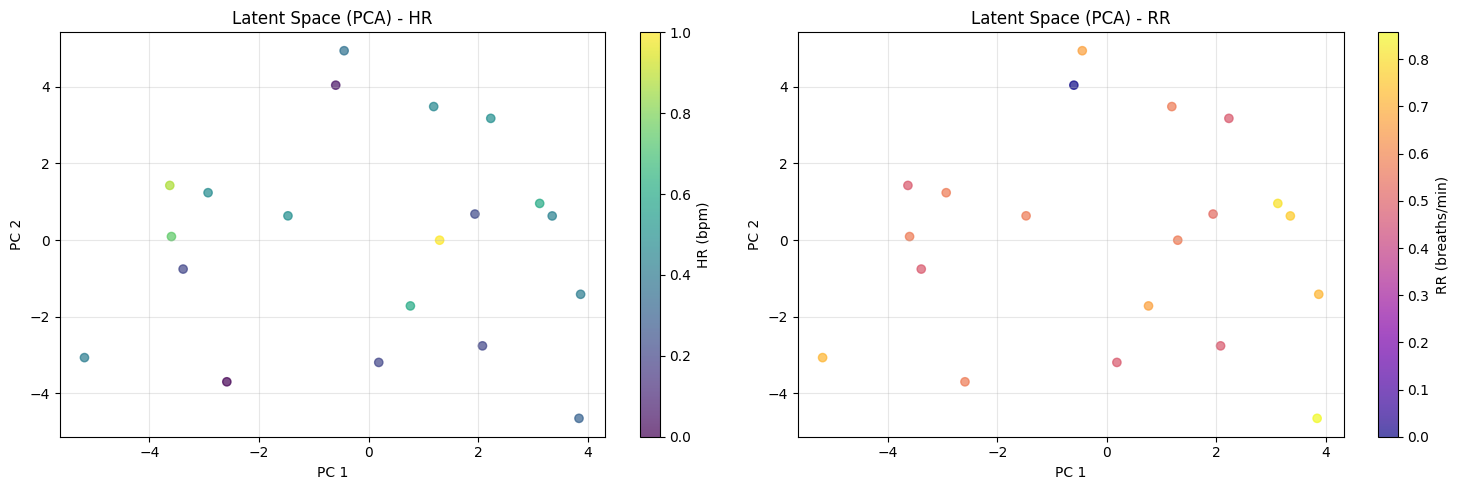

In [127]:
# 3. Trực quan hóa không gian tiềm ẩn thực tế
print("\n3. Trực quan hóa không gian tiềm ẩn")
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(z.numpy())
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=hr_test_real[test_indices], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='HR (bpm)')
plt.title('Latent Space (PCA) - HR')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=rr_test_real[test_indices], cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label='RR (breaths/min)')
plt.title('Latent Space (PCA) - RR')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'latent_space_visualization_standard.png'))
plt.show()  # Hiển thị biểu đồ trên output


4. Trực quan hóa ảnh hưởng của HR và RR


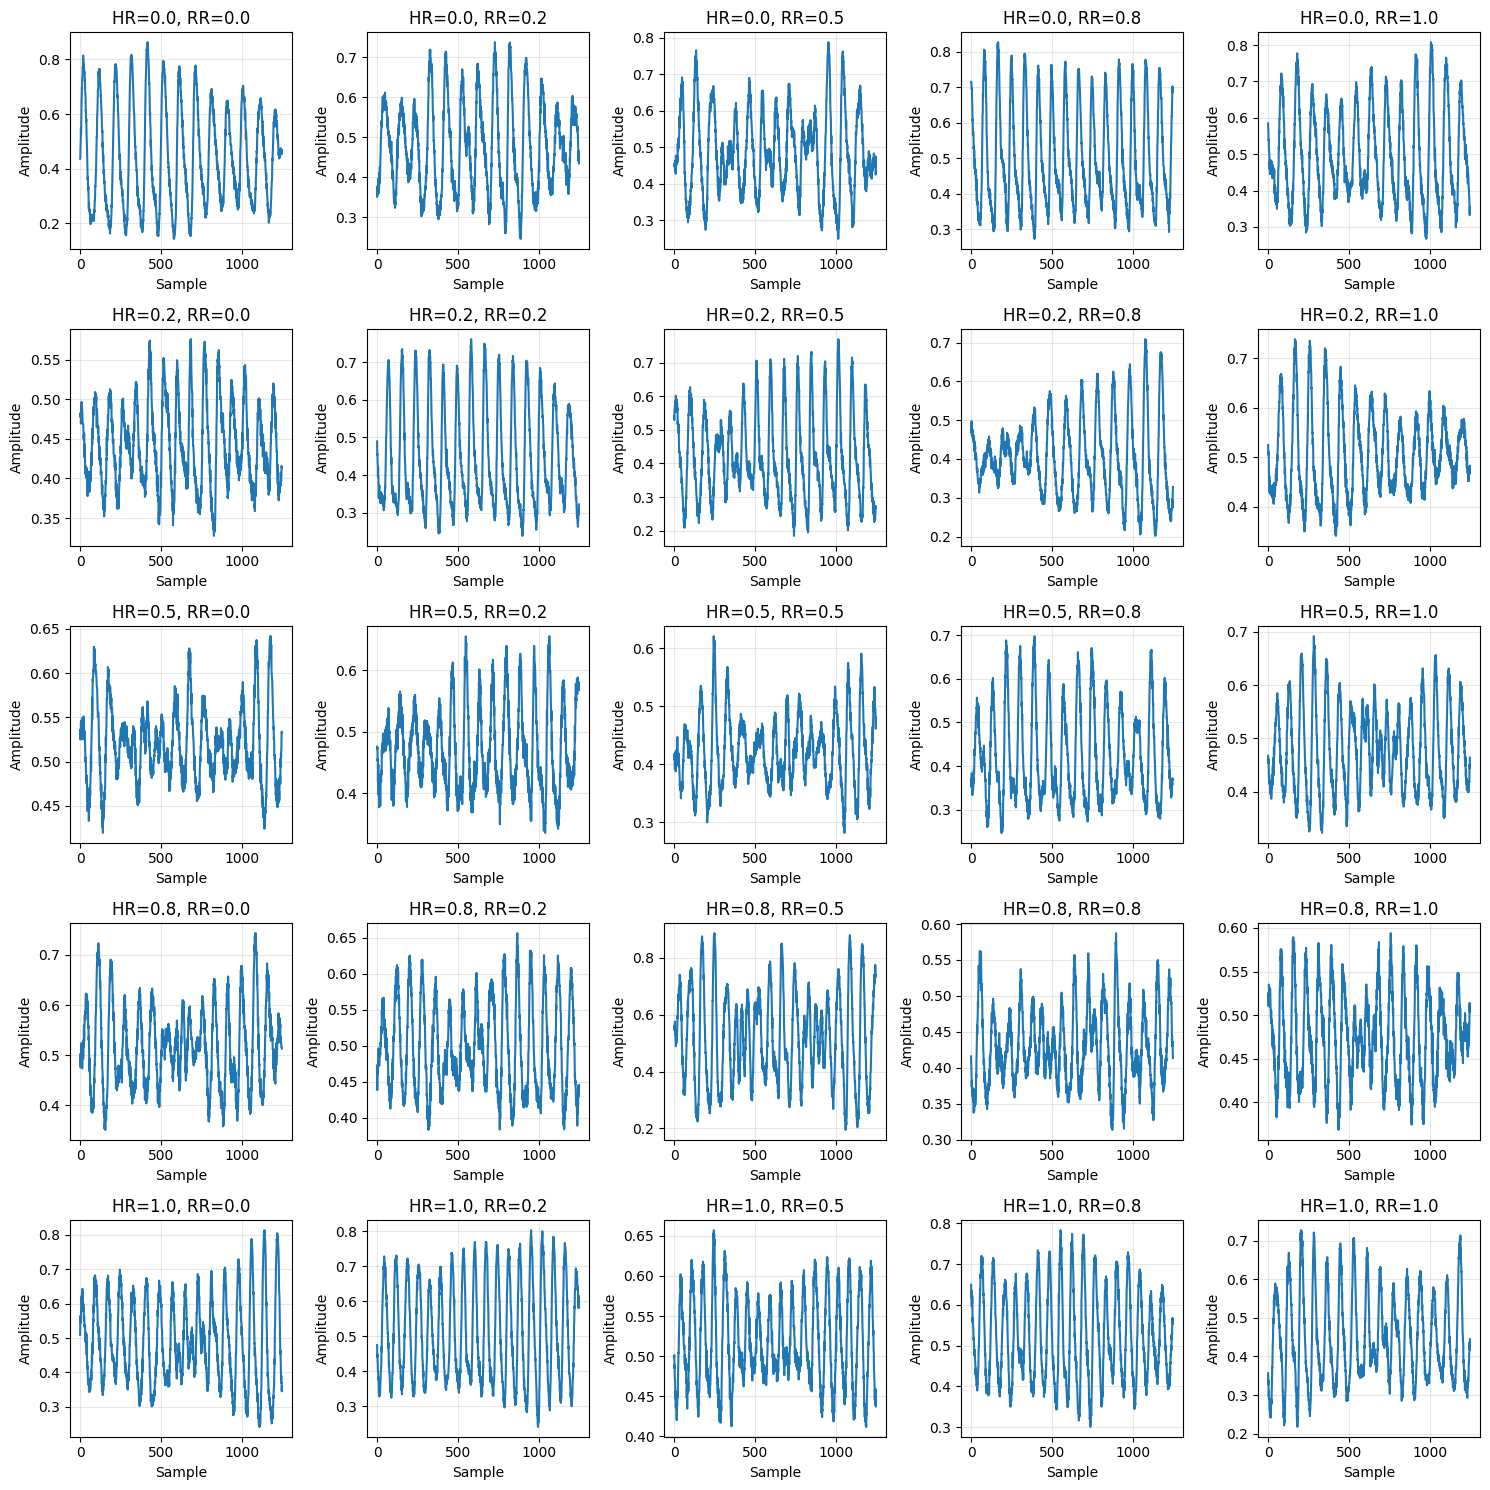

In [128]:
# 4. Trực quan hóa ảnh hưởng của HR và RR
print("\n4. Trực quan hóa ảnh hưởng của HR và RR")
hr_values = np.linspace(hr_min, hr_max, 5)
rr_values = np.linspace(rr_min, rr_max, 5)
hr_norm_values = (hr_values - hr_min) / (hr_max - hr_min)
rr_norm_values = (rr_values - rr_min) / (rr_max - rr_min)

plt.figure(figsize=(15, 15))
for i, hr in enumerate(hr_norm_values):
    for j, rr in enumerate(rr_norm_values):
        condition = np.array([[hr, rr]])
        ppg = cvae.generate(condition).numpy()[0]
        plt.subplot(5, 5, i*5+j+1)
        plt.plot(ppg)
        plt.title(f'HR={hr_values[i]:.1f}, RR={rr_values[j]:.1f}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'hr_rr_effect_on_ppg_standard.png'))
plt.show()  # Hiển thị biểu đồ trên output


5. Trực quan hóa phổ tần số theo HR và RR


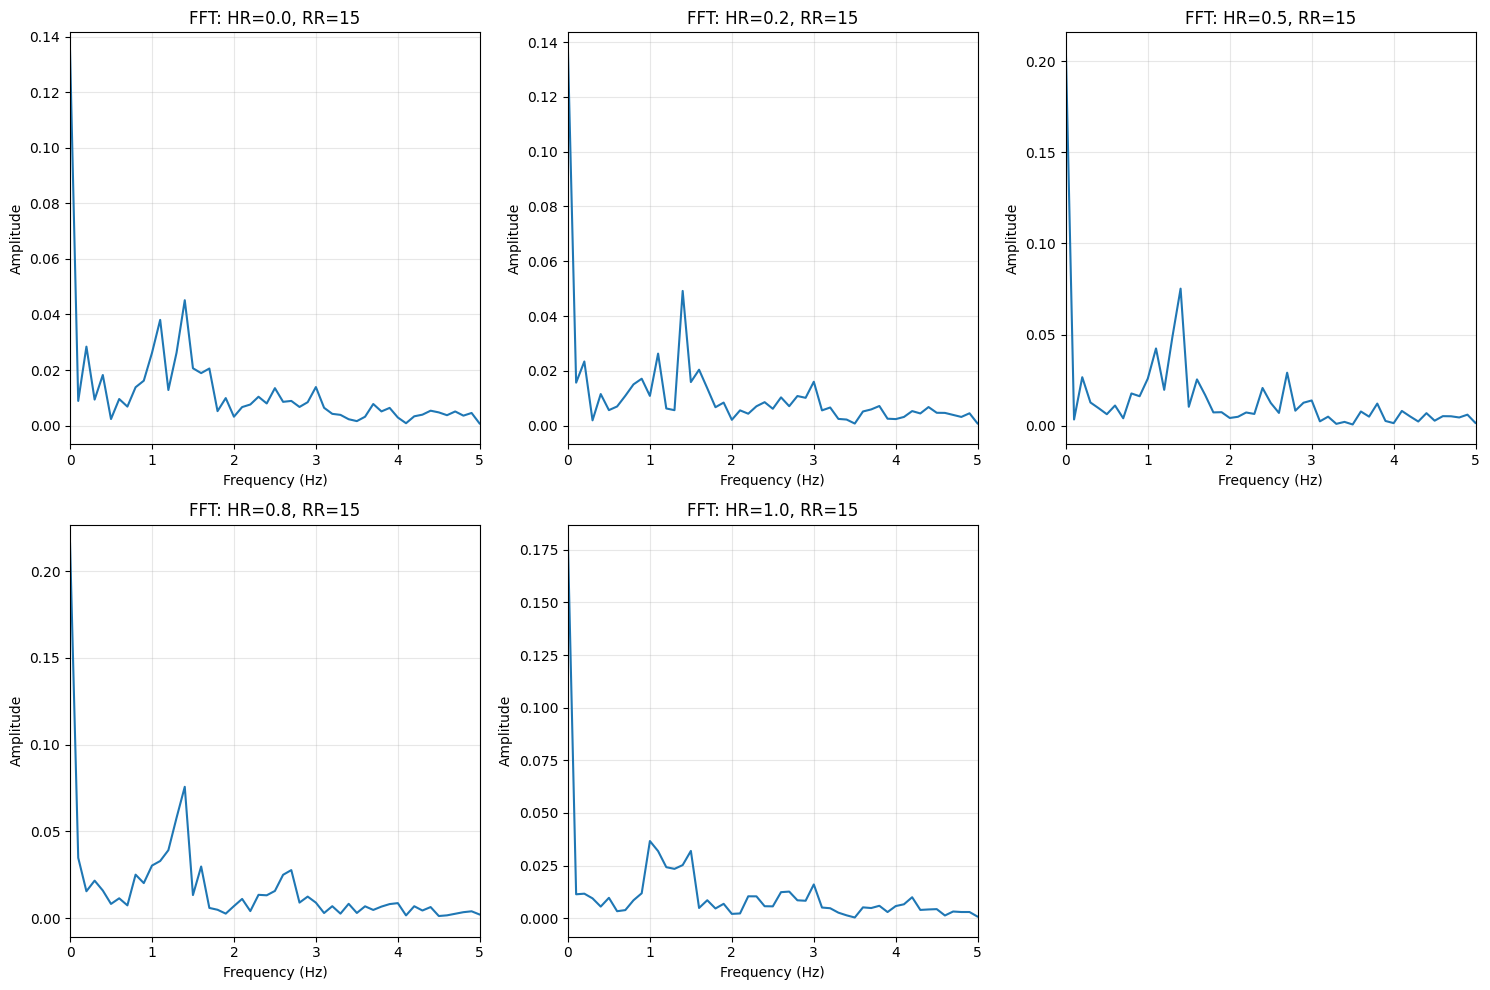

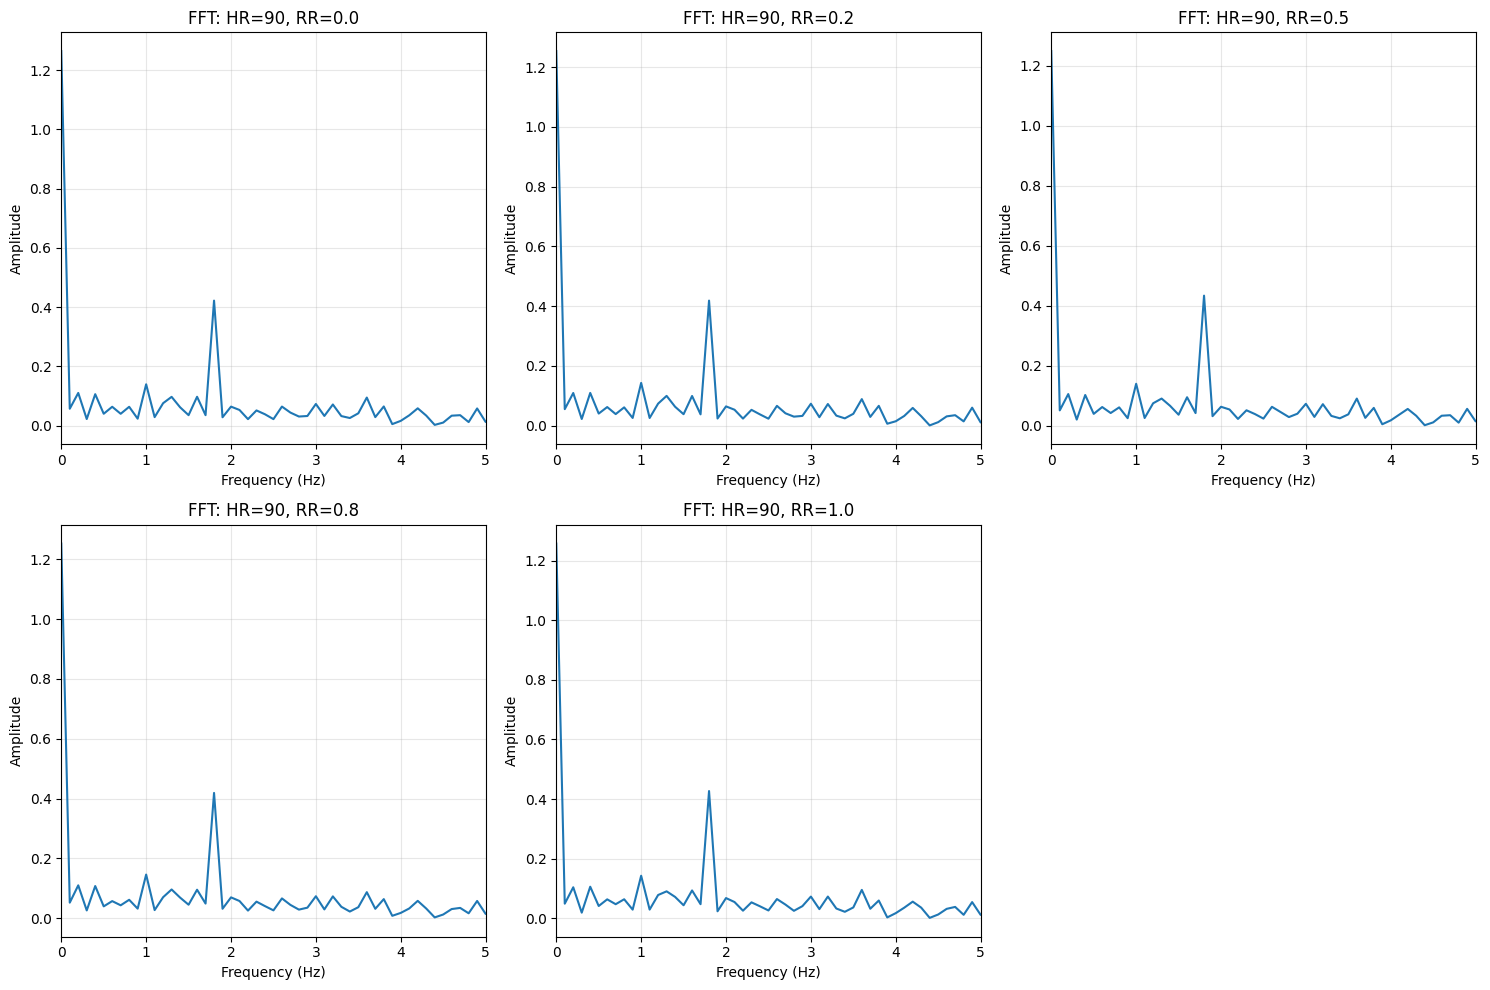

In [129]:
# 5. Trực quan hóa phổ tần số theo HR và RR
print("\n5. Trực quan hóa phổ tần số theo HR và RR")
plt.figure(figsize=(15, 10))
rr_fixed = (15 - rr_min) / (rr_max - rr_min)  # RR cố định ở 15 breaths/min
for i, hr in enumerate(hr_norm_values):
    condition = np.array([[hr, rr_fixed]])
    ppg = cvae.generate(condition).numpy()[0]
    xf, yf = analyze_frequency_spectrum(ppg, fs)
    plt.subplot(2, 3, i+1)
    plt.plot(xf, yf)
    plt.title(f'FFT: HR={hr_values[i]:.1f}, RR=15')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 5])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'hr_effect_on_frequency_standard.png'))
plt.show()

plt.figure(figsize=(15, 10))
hr_fixed = (90 - hr_min) / (hr_max - hr_min)  # HR cố định ở 90 bpm
for i, rr in enumerate(rr_norm_values):
    condition = np.array([[hr_fixed, rr]])
    ppg = cvae.generate(condition).numpy()[0]
    xf, yf = analyze_frequency_spectrum(ppg, fs)
    plt.subplot(2, 3, i+1)
    plt.plot(xf, yf)
    plt.title(f'FFT: HR=90, RR={rr_values[i]:.1f}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 5])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'rr_effect_on_frequency_standard.png'))
plt.show()



6. Trực quan hóa kết quả đánh giá


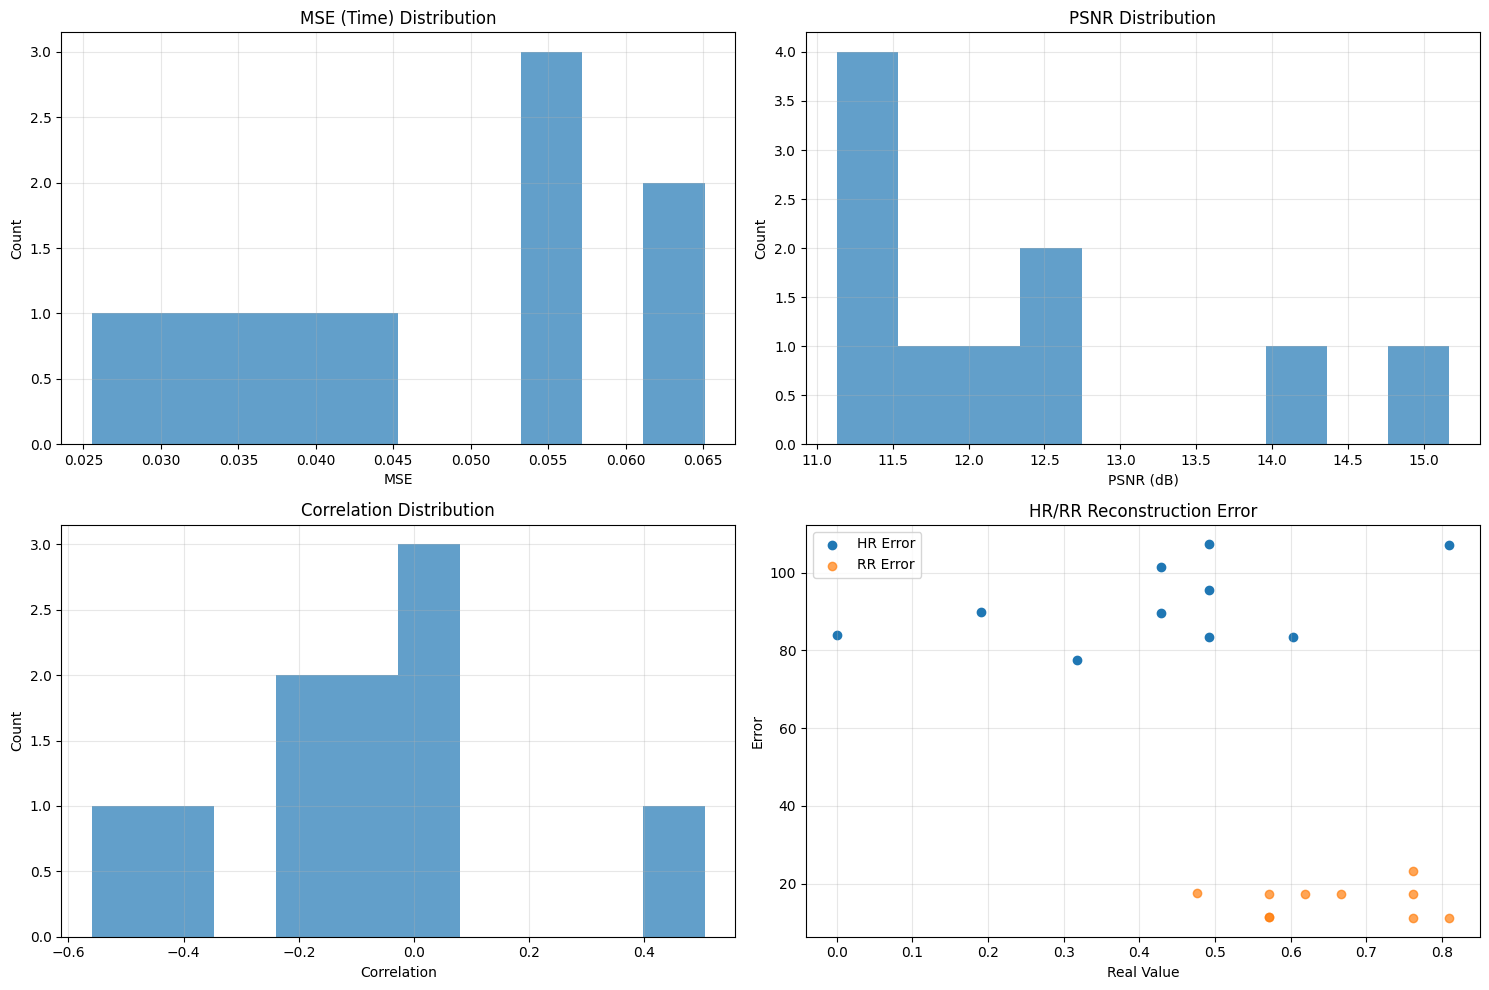


7. Tạo bảng tóm tắt kết quả đánh giá
Kết quả trực quan hóa đã được lưu tại: /content/drive/MyDrive/bidmc/figures/visualize


In [130]:
# 6. Trực quan hóa kết quả đánh giá (nếu có file Fourier)
if os.path.exists(fourier_results_path):
    print("\n6. Trực quan hóa kết quả đánh giá")
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.hist(fourier_results['MSE_Time'], bins=10, alpha=0.7)
    plt.title('MSE (Time) Distribution')
    plt.xlabel('MSE')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.hist(fourier_results['PSNR'], bins=10, alpha=0.7)
    plt.title('PSNR Distribution')
    plt.xlabel('PSNR (dB)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.hist(fourier_results['Corr'], bins=10, alpha=0.7)
    plt.title('Correlation Distribution')
    plt.xlabel('Correlation')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.scatter(fourier_results['HR_Real'], fourier_results['HR_Gen'] - fourier_results['HR_Real'], label='HR Error')
    plt.scatter(fourier_results['RR_Real'], fourier_results['RR_Gen'] - fourier_results['RR_Real'], label='RR Error', alpha=0.7)
    plt.title('HR/RR Reconstruction Error')
    plt.xlabel('Real Value')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, 'evaluation_metrics_distribution_standard.png'))
    plt.show()

    # 7. Tạo bảng tóm tắt kết quả đánh giá
    print("\n7. Tạo bảng tóm tắt kết quả đánh giá")
    summary_stats = {
        'MSE_Time': fourier_results['MSE_Time'].describe().to_dict(),
        'PSNR': fourier_results['PSNR'].describe().to_dict(),
        'Corr': fourier_results['Corr'].describe().to_dict(),
        'MSE_Freq': fourier_results['MSE_Freq'].describe().to_dict(),
        'HR_Error': (fourier_results['HR_Gen'] - fourier_results['HR_Real']).describe().to_dict(),
        'RR_Error': (fourier_results['RR_Gen'] - fourier_results['RR_Real']).describe().to_dict()
    }
    summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
    summary_df.to_csv(os.path.join(results_path, 'evaluation_summary_standard.csv'))

    # Lưu báo cáo
    with open(os.path.join(results_path, 'model_evaluation_results_standard.txt'), 'w') as f:
        f.write("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH Standard CVAE\n")
        f.write("===================================\n\n")
        f.write(f"MSE (Time): Mean={summary_stats['MSE_Time']['mean']:.4f}, Std={summary_stats['MSE_Time']['std']:.4f}\n")
        f.write(f"PSNR: Mean={summary_stats['PSNR']['mean']:.2f}, Std={summary_stats['PSNR']['std']:.2f}\n")
        f.write(f"Corr: Mean={summary_stats['Corr']['mean']:.4f}, Std={summary_stats['Corr']['std']:.4f}\n")
        f.write(f"MSE (Freq): Mean={summary_stats['MSE_Freq']['mean']:.4f}, Std={summary_stats['MSE_Freq']['std']:.4f}\n")
        f.write(f"HR Error: Mean={summary_stats['HR_Error']['mean']:.2f}, Std={summary_stats['HR_Error']['std']:.2f}\n")
        f.write(f"RR Error: Mean={summary_stats['RR_Error']['mean']:.2f}, Std={summary_stats['RR_Error']['std']:.2f}\n\n")
        f.write("Nhận xét: Mô hình tái tạo tín hiệu PPG với chất lượng trung bình, cần cải thiện thêm để phản ánh tốt hơn HR/RR thực tế.\n")
else:
    print("Bỏ qua bước 6 và 7 vì không có file kết quả Fourier.")

print(f"Kết quả trực quan hóa đã được lưu tại: {figures_path}")